In [48]:
from __future__ import print_function
import json
import matplotlib
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import math

In [49]:
json_data=open('../json.data/contest_v1.json')
data = json.load(json_data)
json_data.close()

json_rank=open('../json.data/ranklist.json')
rank = json.load(json_rank)
json_rank.close()

json_op=open('../json.data/contest_out_operators.json')
op = json.load(json_op)
json_op.close()

json_dt=open('../json.data/contest_out_datatypes.json')
dt = json.load(json_dt)
json_dt.close()

In [50]:
len(data)

8048

In [51]:
data[0]

{'filename': '1542501099.cpp',
 'nloc': 28,
 'token_count': 285,
 'problem': 'https://www.codeforces.com/contest/868/problem/B',
 'solution': 'https://www.codeforces.com/contest/868/submission/45891140',
 'exec_time': '31 ms',
 'memory': '300 KB',
 'usertype': 'Candidate',
 'function_count': 1,
 'library_count': 1,
 'used_headers': 1,
 'macro_count': 10,
 'used_macros': 5,
 'function_details': [{'cyclomatic_complexity': 18,
   'nloc': 18,
   'token_count': 222,
   'name': 'main',
   'long_name': 'main()',
   'start_line': 33,
   'end_line': 67,
   'parameters': [],
   'filename': '1542501099.cpp',
   'top_nesting_level': 0,
   'length': 35,
   'fan_in': 0,
   'fan_out': 0,
   'general_fan_out': 0}]}

In [52]:
print(type(rank),type(op), type(dt))
print(op[0])
print(dt[0])

<class 'dict'> <class 'list'> <class 'list'>
{'filename': '1542501099.cpp', 'operators': 10, 'boolean_operators': 10, 'binary_operators': 0}
{'filename': '1542501099.cpp', 'unsigned ll': 0, 'unisgned int': 0, 'unsigned long': 0, 'long long': 1, 'long': 0, 'int': 4, 'long double': 0, 'double': 0, 'float': 0, 'char': 0, 'string': 0, 'scanf': 0, 'printf': 0, 'cin': 2, 'cout': 1, '#define': 2, 'typedef': 8, '#pragma': 0, 'fast_io': 0}


In [53]:
set1 = set([])
data_uniq = []
for x in data:
    if x['solution'] not in set1:
        set1.add(x['solution'])
        data_uniq.append(x)
data = data_uniq[:]
print(len(data))

7943


In [54]:
#Check for order of files in data and op are same or not
for i in range(len(data)):
    if not data[i]['filename']==op[i]['filename']:
        print(i,data[i]['filename'], op[i]['filename'])
        print('No')
        break

2 1542501110.cpp 1542501106.cpp
No


In [55]:
i = 0
file_order_op = {}
for x in op:
    file_order_op[x['filename']] = i
    i += 1
    
i = 0
file_order_dt = {}
for x in dt:
    file_order_dt[x['filename']] = i
    i += 1

In [56]:
op[file_order_op['1542501099.cpp']]['operators']

10

In [57]:
dt[file_order_dt['1542501099.cpp']]['int']

4

In [122]:
tph = []
prob_cat = ['A','B']
main_cat = ['Expert','Master','Newbie','Pupil','Specialist','Unrated,','Candidate','International']
fin_list_AB = []
prob_AB = {}
count_AB = 0
for x in data:
    if x['problem'][-1] in prob_cat:
        if x['token_count'] > 0 and x['usertype'] in main_cat:
            json_tmp=open('../contest/'+x['filename'].split('.')[0]+'.json')
            tmp = json.load(json_tmp)
            try:
                tph.append(rank[tmp['username']])
                try:
                    prob_AB[tmp['username']].append(x['filename'])
                except:
                    prob_AB[tmp['username']] = [x['filename']]
            except:
                pass
            json_tmp.close()
for x,w in prob_AB.items():
    if len(w)>2:
        print(x,w)
    if len(w)==2:
        count_AB += 1
print(count_AB)
print(prob_AB['Akikaze'])

dodo_xxy ['1542532400.cpp', '1542532404.cpp', '1542581045.cpp']
henuwhr ['1542533587.cpp', '1542574089.cpp', '1542574117.cpp', '1542579743.cpp']
claudy ['1542533599.cpp', '1542578518.cpp', '1542593624.cpp']
kakakaka ['1542535177.cpp', '1542535184.cpp', '1542575878.cpp', '1542588646.cpp']
hyesuixin ['1542535511.cpp', '1542579113.cpp', '1542585633.cpp']
LSC333 ['1542535730.cpp', '1542583158.cpp', '1542588673.cpp']
kailashnath1998 ['1542537230.cpp', '1542537236.cpp', '1542577904.cpp', '1542589891.cpp']
WHzy ['1542550700.cpp', '1542550706.cpp', '1542550722.cpp', '1542588424.cpp']
Mr_Illuminati ['1542557348.cpp', '1542557352.cpp', '1542583055.cpp']
AAWisong ['1542558228.cpp', '1542587059.cpp', '1542589881.cpp']
Noam527 ['1542558232.cpp', '1542585330.cpp', '1542594077.cpp']
terminal ['1542559240.cpp', '1542559264.cpp', '1542582820.cpp']
dorijanlendvaj ['1542559313.cpp', '1542561560.cpp', '1542587687.cpp', '1542594442.cpp']
nikitawani ['1542559339.cpp', '1542561362.cpp', '1542579304.cpp']
Aam

In [125]:
up_1 = 0
up_2 = 0
down_1 = 0
down_2 = 0
function_count = []
nloc = []
token_count = []
library_count = []
used_library = []
used_library_per = []
macro_count = []
used_macro = []
used_macro_per = []
usertype = []
mat_op = []
logical_op = []
bit_op = []
pragma = []
fastio = []
dt_order = ['unsigned ll', 'unisgned int', 'unsigned long', 'long long', 'long', 'int', 'long double', 'double', 'float', 'char', 'string']
dt_count_1 = [[] for i in range(len(dt_order))]
dt_count_2 = [[] for i in range(len(dt_order))]
# print(dt_count_1)
main_div1 = ['Expert','Master','Candidate','International']
main_div2 = ['Newbie','Pupil','Specialist']
prob_A = 0
prob_B = 0
count_AB = 0
user_rank = []
userdiv = []
time_A = []
time_B = []
cio = []
scpr = []
mp = 0
for x in data:
    if x['problem'][-1] in prob_cat:
        if x['token_count'] > 0 and x['usertype'] in main_cat:
            json_tmp=open('../contest/'+x['filename'].split('.')[0]+'.json')
            tmp = json.load(json_tmp)
            try:
                if len(prob_AB[tmp['username']])==2:
                    if rank[tmp['username']][1]==-1 or rank[tmp['username']][2]==-1:
                        mp+=1
                        continue
                    user_rank.append(rank[tmp['username']][0])
                    tA = rank[tmp['username']][1].split(':')
                    tA = int(tA[0])*60 + int(tA[1])
                    time_A.append(tA)
                    tB = rank[tmp['username']][2].split(':')
                    tB = int(tB[0])*60 + int(tB[1])
                    time_B.append(tB)
                    if int(user_rank[-1])<=920:
                        userdiv.append('Upper')
                        if (x['usertype'] in main_div1):
                            up_1 += 1
                        else:
                            up_2 += 1
                    else:
                        userdiv.append('Lower')
                        if (x['usertype'] in main_div1):
                            down_1 += 1
                        else:
                            down_2 += 1
                    function_count.append(x['function_count'])
                    nloc.append(x['nloc'])
                    token_count.append(x['token_count'])
                    macro_count.append(x['macro_count'])
                    used_macro.append(x['used_macros'])
                    library_count.append(x['library_count'])
                    used_library.append(x['used_headers'])
                    used_macro_per.append(0 if x['macro_count']==0 else (x['used_macros']/x['macro_count'])*100)
                    used_library_per.append(100 if x['library_count']==0 else (x['used_headers']/x['library_count'])*100)
                    usertype.append(x['usertype'])
                    mat_op.append(op[file_order_op[x['filename']]]['operators'])
                    logical_op.append(op[file_order_op[x['filename']]]['boolean_operators'])
                    bit_op.append(op[file_order_op[x['filename']]]['binary_operators'])
                    pragma.append(dt[file_order_dt[x['filename']]]['#pragma'])
                    fastio.append(dt[file_order_dt[x['filename']]]['fast_io'])
                    scpr.append((dt[file_order_dt[x['filename']]]['scanf'],dt[file_order_dt[x['filename']]]['printf']))
                    cio.append((dt[file_order_dt[x['filename']]]['cin'],dt[file_order_dt[x['filename']]]['cout']))
                    for i in range(len(dt_order)):
                        if userdiv[-1]=='Upper':
        #                     print(dt_count_1[i])
                            dt_count_1[i].append(dt[file_order_dt[x['filename']]][dt_order[i]])
        #                     print(dt[file_order_dt[x['filename']]])
        #                     print(dt_order[i])
                        else:
                            dt_count_2[i].append(dt[file_order_dt[x['filename']]][dt_order[i]])
                    if x['problem'][-1]=='A':
                        prob_A += 1
                    else:
                        prob_B += 1
            except Exception as e:
                pass
            json_tmp.close()
print(len(user_rank))
print(prob_A,prob_B)
# print(dt_count_1[0])
print(time_A)
print(len(user_rank)-mp)

1700
850 850
[7, 4, 8, 9, 6, 100, 11, 5, 4, 10, 8, 9, 6, 19, 23, 18, 139, 28, 156, 22, 70, 48, 42, 25, 156, 11, 152, 23, 36, 11, 6, 9, 12, 136, 10, 34, 150, 147, 74, 146, 97, 145, 145, 116, 7, 11, 18, 139, 145, 137, 7, 136, 4, 12, 22, 8, 14, 5, 39, 130, 76, 28, 17, 128, 10, 62, 127, 10, 127, 6, 26, 145, 4, 60, 124, 35, 8, 10, 6, 11, 124, 122, 16, 11, 24, 5, 9, 5, 38, 11, 116, 51, 4, 62, 66, 9, 7, 69, 37, 6, 4, 36, 84, 13, 93, 49, 107, 6, 79, 24, 41, 104, 13, 6, 102, 28, 6, 17, 7, 76, 89, 17, 100, 100, 100, 64, 24, 20, 7, 14, 5, 13, 27, 53, 24, 98, 97, 97, 5, 95, 7, 4, 27, 81, 95, 95, 93, 93, 94, 47, 11, 10, 8, 4, 130, 43, 9, 3, 91, 91, 14, 17, 21, 107, 35, 89, 89, 4, 12, 21, 15, 5, 7, 9, 23, 8, 40, 30, 6, 11, 39, 84, 84, 10, 43, 55, 5, 9, 41, 95, 20, 91, 3, 28, 22, 72, 81, 82, 81, 95, 16, 9, 6, 8, 100, 80, 18, 79, 25, 127, 8, 23, 32, 12, 80, 97, 77, 16, 9, 11, 10, 23, 127, 16, 76, 76, 76, 6, 84, 7, 10, 30, 5, 47, 12, 38, 13, 89, 20, 75, 12, 74, 74, 6, 27, 102, 73, 12, 14, 72, 72, 16, 1

In [127]:
print('Upper',userdiv.count('Upper'))
print('1',up_1,'2',up_2)
print('Lower',userdiv.count('Lower'))
print('1',down_1,'2',down_2)

Upper 1020
1 686 2 334
Lower 680
1 166 2 514


In [128]:
def plot_data_1D(a,title='title'):
    plt.hlines(1,1,np.max(a)+np.max(a)*0.5)
    plt.xlim(0,np.max(a)+1)
    plt.ylim(0.5,1.5)
    y = np.ones(np.shape(a))
    plt.plot(a,y,'|',ms = 40)
    plt.title(title)

In [129]:
def plot_data_2D(X,Y,title='title',color='b'):
    plt.scatter(X,Y,c=color,alpha=0.1)
    plt.title(title)

In [130]:
def plotdata_frequency(data,title='title'):
    plt.hist(data, bins=np.arange(np.min(data), np.max(data)+1), align='left')
    plt.title(title)

In [131]:
def stat_display(data):
    stat_data = stats.describe(data)
    print ('min : ' , stat_data.minmax[0])
    print ('max : ' , stat_data.minmax[1])
    print ('mean : ' , stat_data.mean)
    print ('variance : ' , stat_data.variance)
    print ('skewness : ' , stat_data.skewness)
    print ('kurtosis : ' , stat_data.kurtosis)

In [132]:
def find_max_json(arr):
    return data[np.argmax(arr)]

In [133]:
def find_min_json(arr):
    return data[np.argmin(arr)]

In [134]:
def plot_data_1D_cat(X,C,title='Title',xl='xlabel',yl='ylabel'):
    c = ['b','r','m','g','c','y']
    Y = []
#     map_c = {}
#     for x,i in zip(set(C),range(len(set(C)))):
#         map_c[x] = c[i%6]
#     c = map(lambda x: map_c[x], C)
    f, ax = plt.subplots(len(set(C)),sharex=True,sharey=True)
    for x,i in zip(set(C),range(len(set(C)))):
        data = []
        for y,w in zip(X,C):
            if w == x:
                data.append(y)
        ax[i].hlines(1,1,np.max(data)+np.max(data)*0.5)
        
        Y = np.ones(len(data))
        
        ax[i].plot(data,Y,'|',ms = 40,c = c[i%6],label=x)
        ax[i].xlabel(xl)
        ax[i].ylabel(yl)
        ax[i].legend(loc="upper right")
    plt.title(title,y=2.4)

In [135]:
def plot_data_2D_cat(X,Y,C,title='Title',xl='xlabel',yl='ylabel'):
    c = ['b','r','m','g','c','y']
#     map_c = {}
#     for x,i in zip(set(C),range(len(set(C)))):
#         map_c[x] = c[i%6]
#     c = map(lambda x: map_c[x], C)
    f, ax = plt.subplots(len(set(C)),sharex=True,sharey=True)
    cat = []
    plot = []
    for x,i in zip(set(C),range(len(set(C)))):
        data = []
        point = []
        for y,z,w in zip(X,Y,C):
            if w == x:
                data.append(y)
                point.append(z)
    
        l = ax[i].scatter(data,point,c=c[i%6],alpha=0.2)
        ax[i].set_xlabel(xl)
        ax[i].set_ylabel(yl)
        plot.append(l)
        cat.append(x)
    plt.title(title,y=2.4) 
    plt.legend(plot,cat,bbox_to_anchor=(1.2, 1),
           bbox_transform=plt.gcf().transFigure)

In [136]:
def plot_frequency_cat(X,C,title='Title',l=False,xl='xlabel',yl='ylabel'):
    c = ['b','r','m','g','c','y']
    f, ax = plt.subplots(len(set(C)),sharex=True,sharey=True)
    for x,i in zip(set(C),range(len(set(C)))):
        data = []
        for y,w in zip(X,C):
            if w == x:
                data.append(y)
        ax[i].hist(data, bins=np.arange(np.min(data), np.max(data)+1), align='left',label=x,color=c[i%6],log=l)
        ax[i].legend(prop={'size':10})
        ax[i].xlabel(xl)
        ax[i].ylabel(yl)
    plt.title(title,y=2.4)
#     plt.legend(plot,cat)

In [137]:
def box_plot_cat(X,C,title='Title',xl='xlabel',yl='ylabel'):
    l = [[]]*len(set(C))
    label = [[]]*len(set(C))
    for x,i in zip(set(C),range(len(set(C)))):
        data = []
        for y,w in zip(X,C):
            if w == x:
                data.append(y)
        l[i] = data
        label[i] = x
    fig = plt.figure(1, figsize=(9, 6))
    plt.title(title)
    ax = fig.add_subplot(111)
    bp = ax.boxplot(l,showmeans=True)
    ax.set_xticklabels(label)
    ax.set_xlabel(xl)
    ax.set_ylabel(yl)

In [138]:
def pie_plot(X,C,title='Title'):
    f, ax = plt.subplots(len(set(C)),sharex=True,sharey=True)
    c = ['b','r','m','g','c','y']
    cat = list(set(X))
    for x,i in zip(set(C),range(len(set(C)))):
        data = {}
        sizes = []
        for y,w in zip(X,C):
            if w==x:
                try:
                    data[y] +=1
                except:
                    data[y] = 1
        for each in cat:
            sizes.append(data[each])
        explode = [0]*len(cat)
        explode[sizes.index(max(sizes))] = 0.1
        ax[i].pie(sizes, explode=explode, labels=cat, colors=c,autopct='%1.1f%%', shadow=True, startangle=140)
        ax[i].set_title(x)
    plt.title(title, y=2.3)

In [139]:
def scgraph(X,Y,title='Title',xl='xlabel',yl='ylabel'):
    X = [int(x) for x in X]
    dbl = [(x,y) for x,y in zip(X,Y)]
    dbl.sort()
#     print(dbl)
    X = [x for (x,y) in dbl]
    Y = [y for (x,y) in dbl]
    col = []
    for i in range(len(X)):
        if X[i]<=920:
            col.append('b')
        else:
            col.append('r')
#     print(col)
    plt.scatter(X,Y,alpha=0.1,c=col)
    plt.xticks(rotation='vertical')
    plt.title(title)
    plt.xlabel(xl)
    plt.ylabel(yl)

In [140]:
fig_size = plt.rcParams["figure.figsize"]
print(fig_size)
fig_size[0] = 20
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size
plt.rcParams["figure.figsize"]

[9.0, 12.0]


[20.0, 12.0]

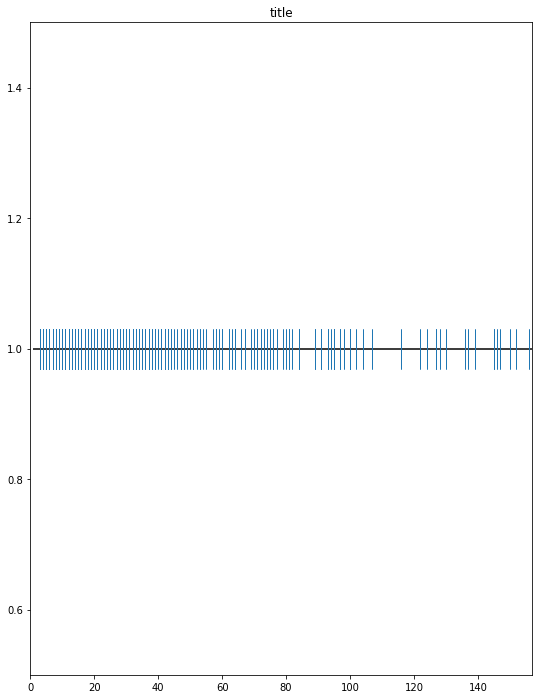

In [183]:
plot_data_1D(time_A)

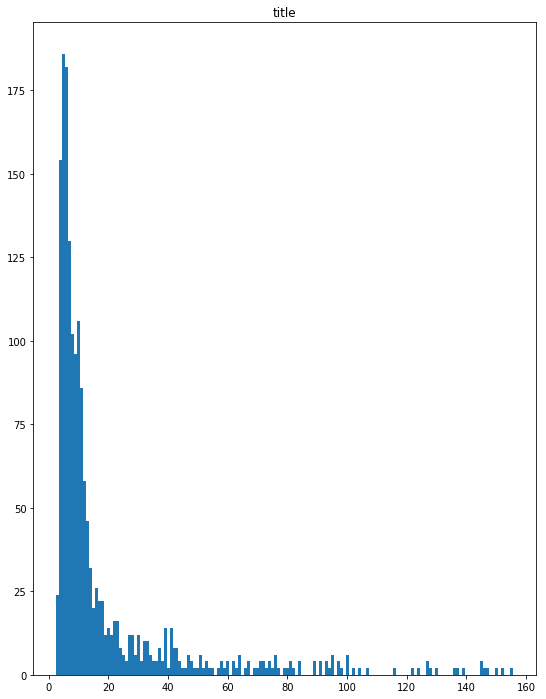

In [182]:
plotdata_frequency(time_A)

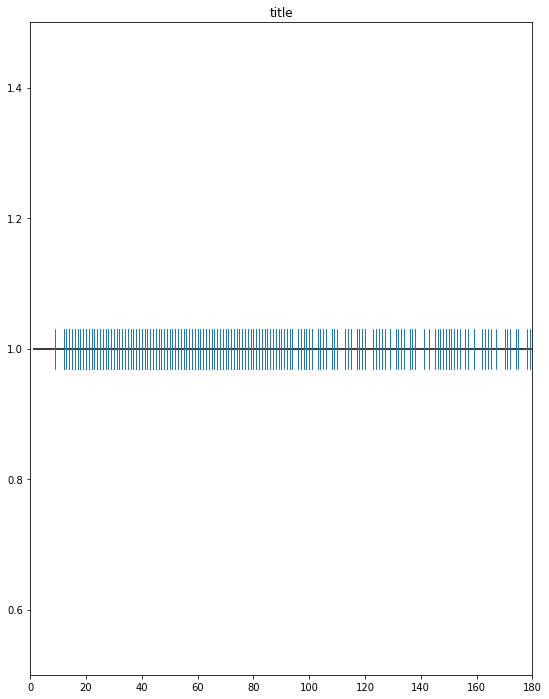

In [184]:
plot_data_1D(time_B)

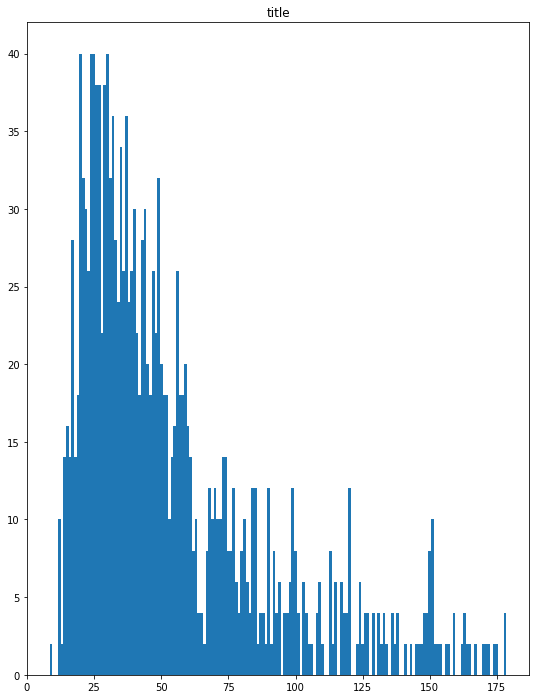

In [185]:
plotdata_frequency(time_B)

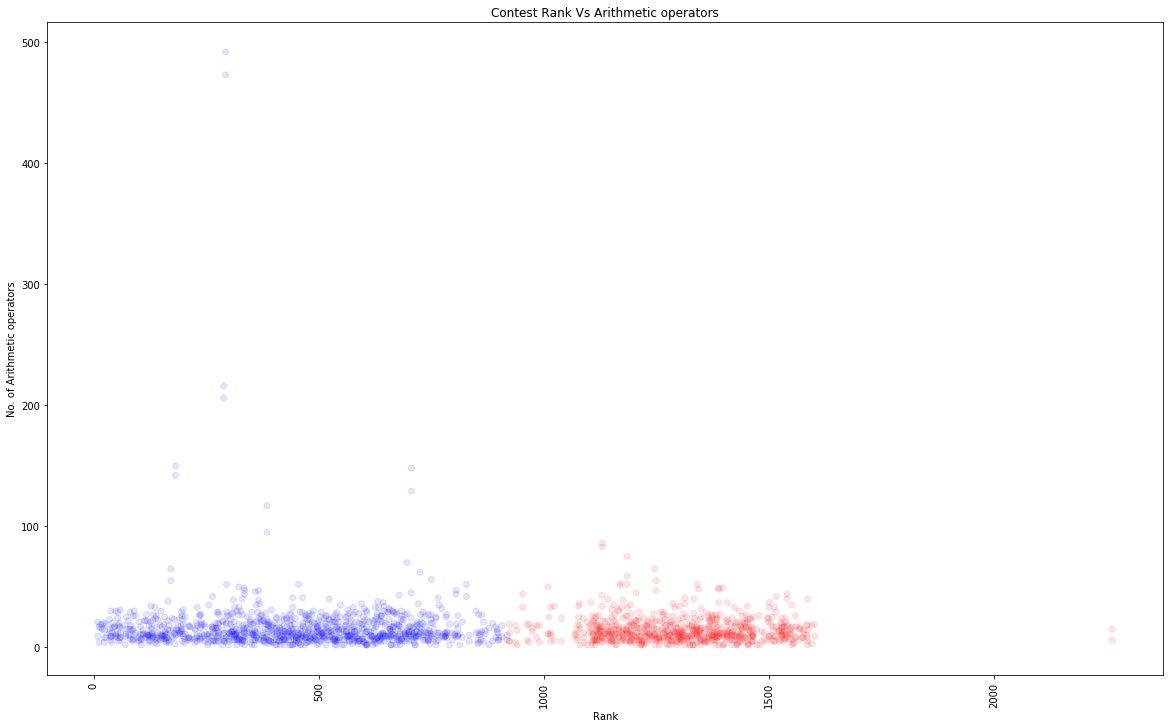

In [142]:
scgraph(user_rank,mat_op,'Contest Rank Vs Arithmetic operators','Rank','No. of Arithmetic operators')

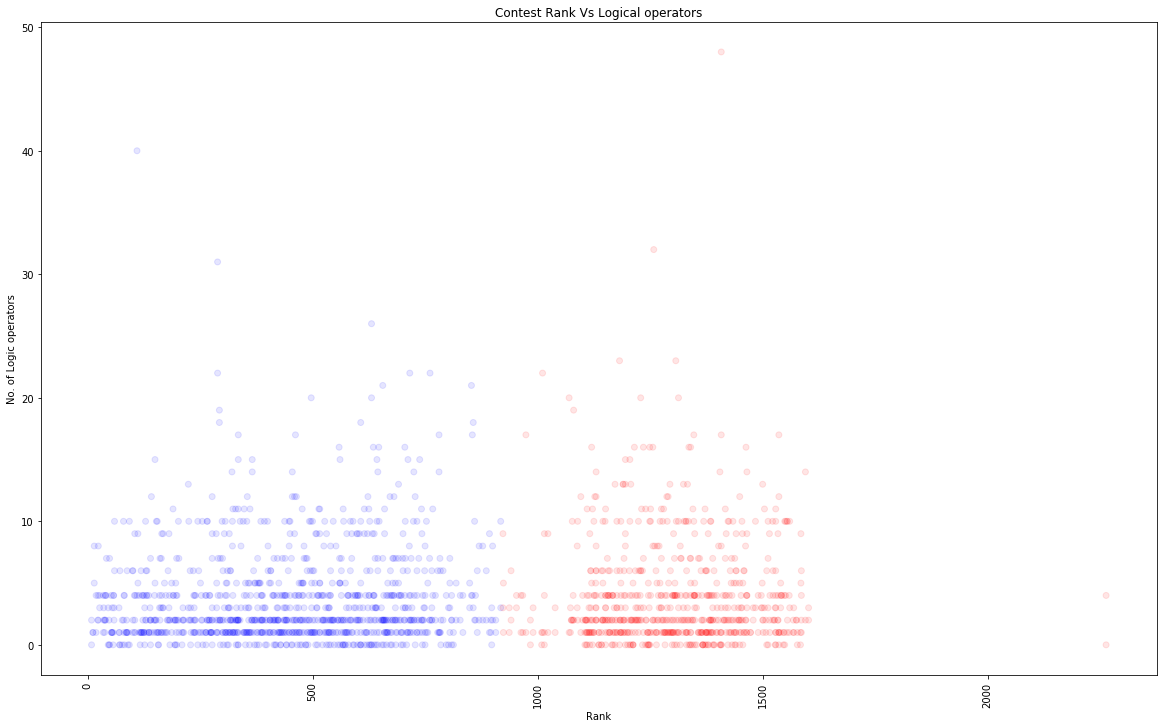

In [143]:
scgraph(user_rank,logical_op,'Contest Rank Vs Logical operators','Rank','No. of Logic operators')

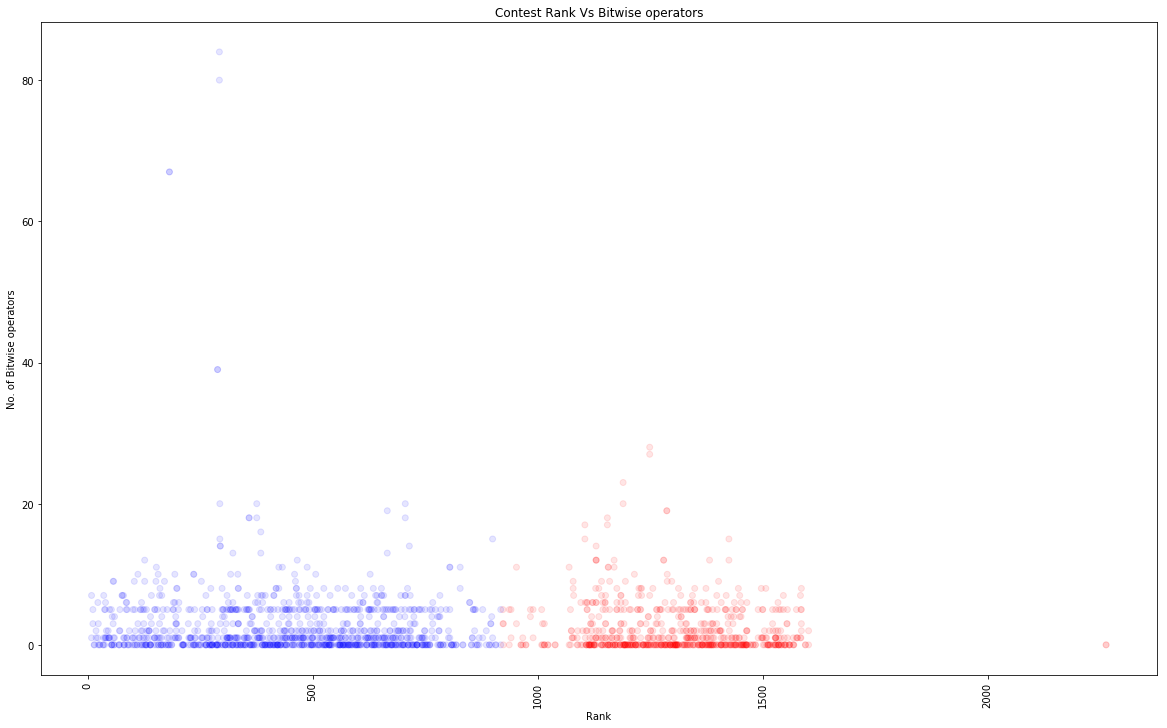

In [144]:
scgraph(user_rank,bit_op,'Contest Rank Vs Bitwise operators','Rank','No. of Bitwise operators')

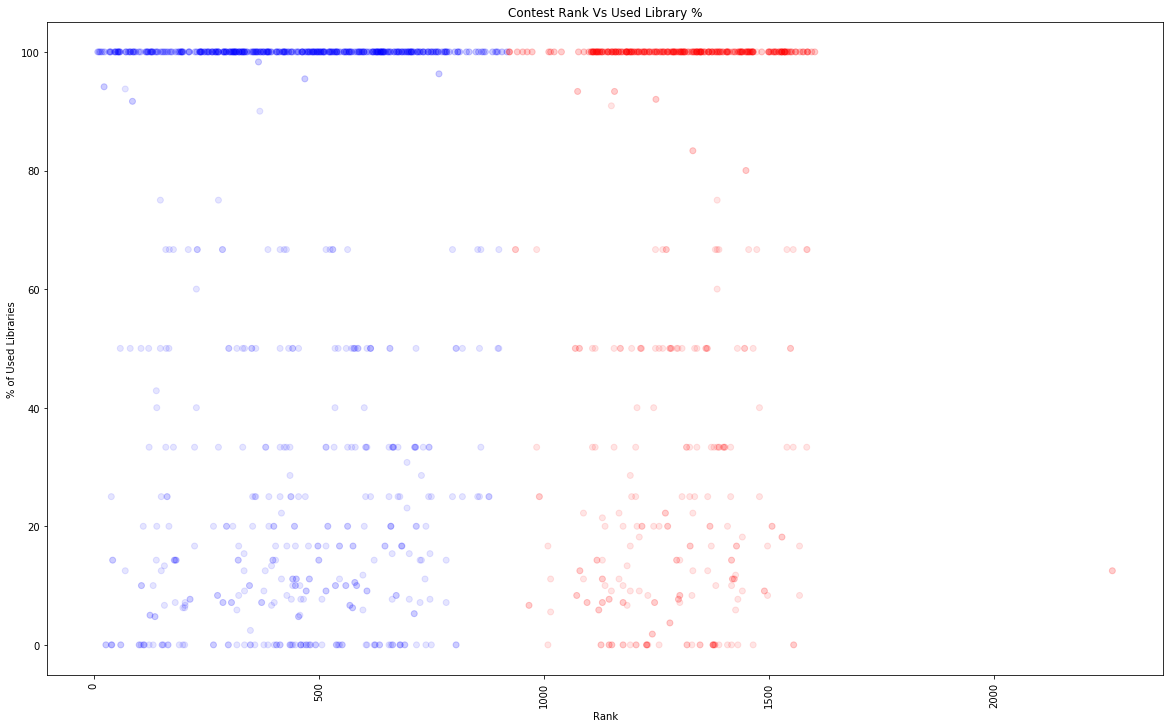

In [145]:
scgraph(user_rank,used_library_per,'Contest Rank Vs Used Library %','Rank','% of Used Libraries')

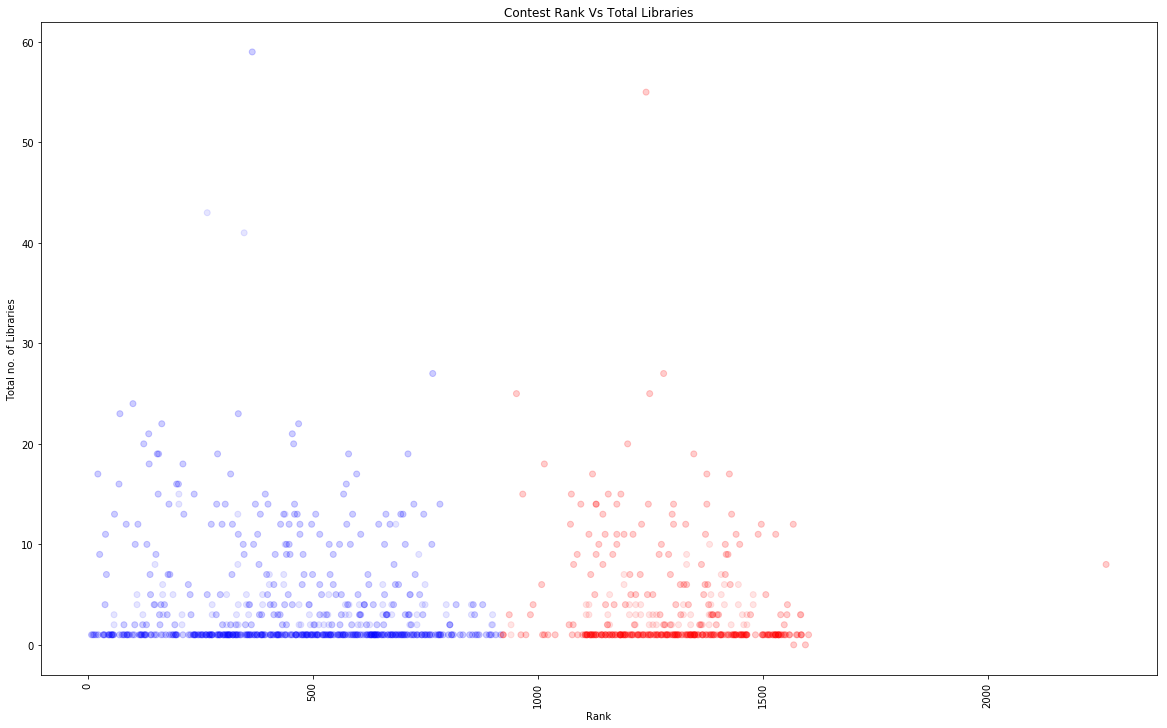

In [146]:
scgraph(user_rank,library_count,'Contest Rank Vs Total Libraries','Rank','Total no. of Libraries')

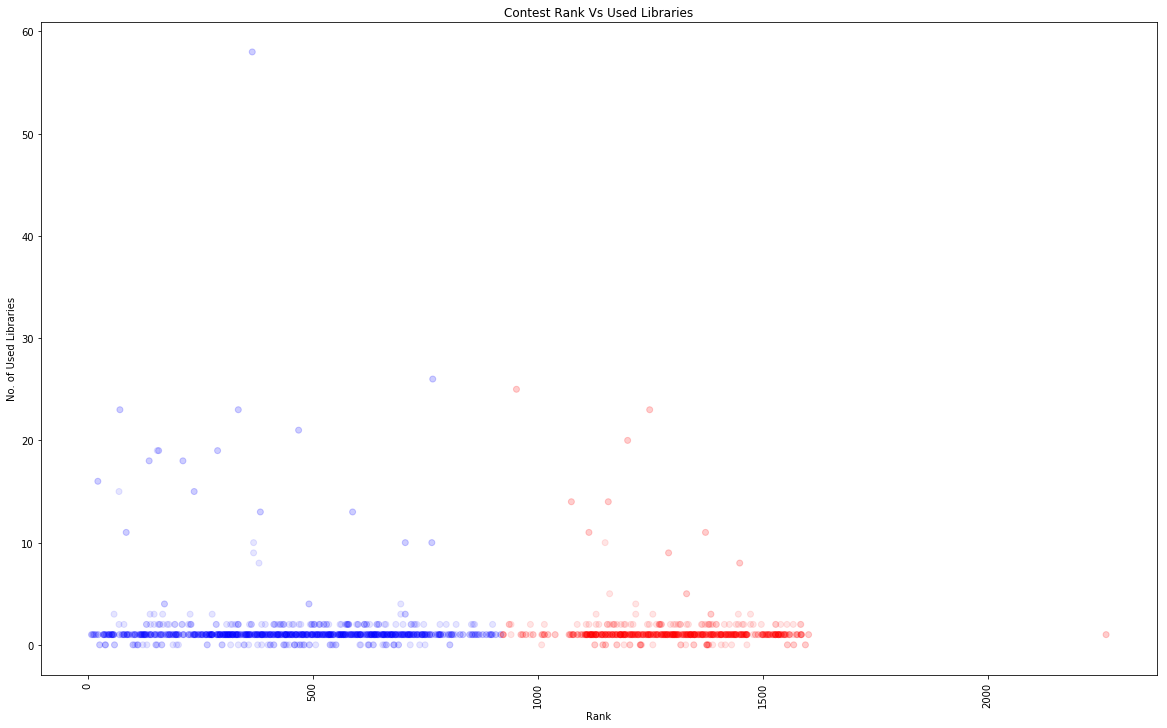

In [147]:
scgraph(user_rank,used_library,'Contest Rank Vs Used Libraries','Rank','No. of Used Libraries')

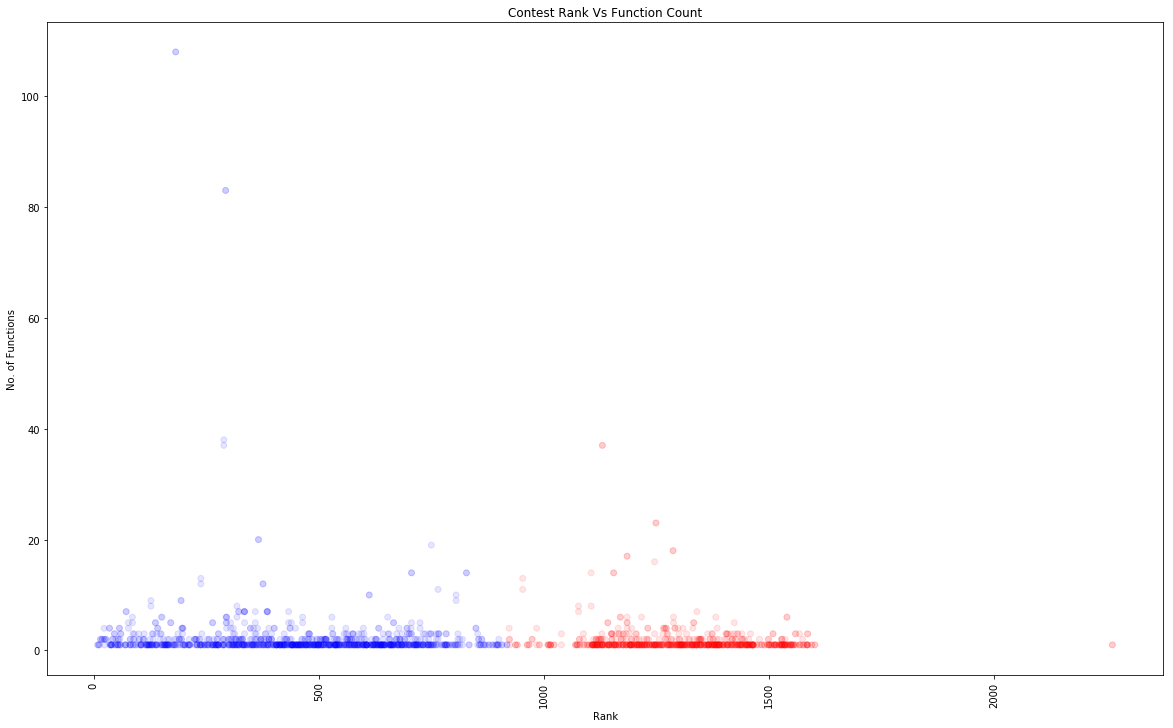

In [148]:
scgraph(user_rank,function_count,'Contest Rank Vs Function Count','Rank','No. of Functions')

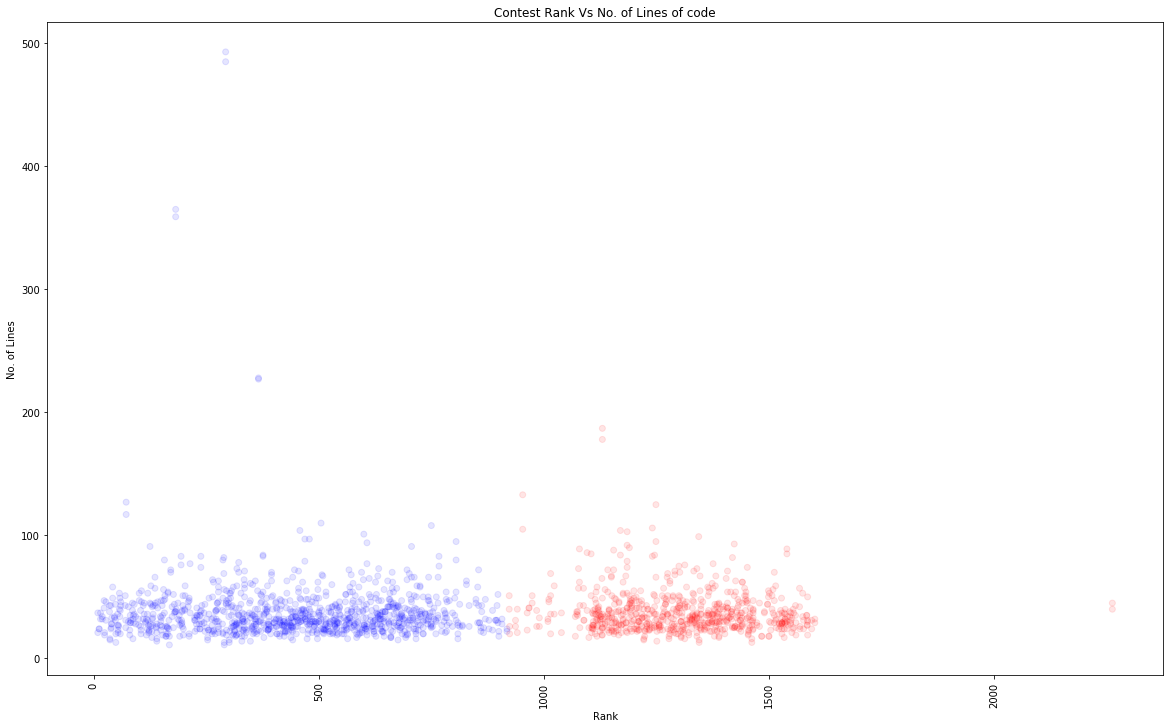

In [149]:
scgraph(user_rank,nloc,'Contest Rank Vs No. of Lines of code','Rank','No. of Lines')

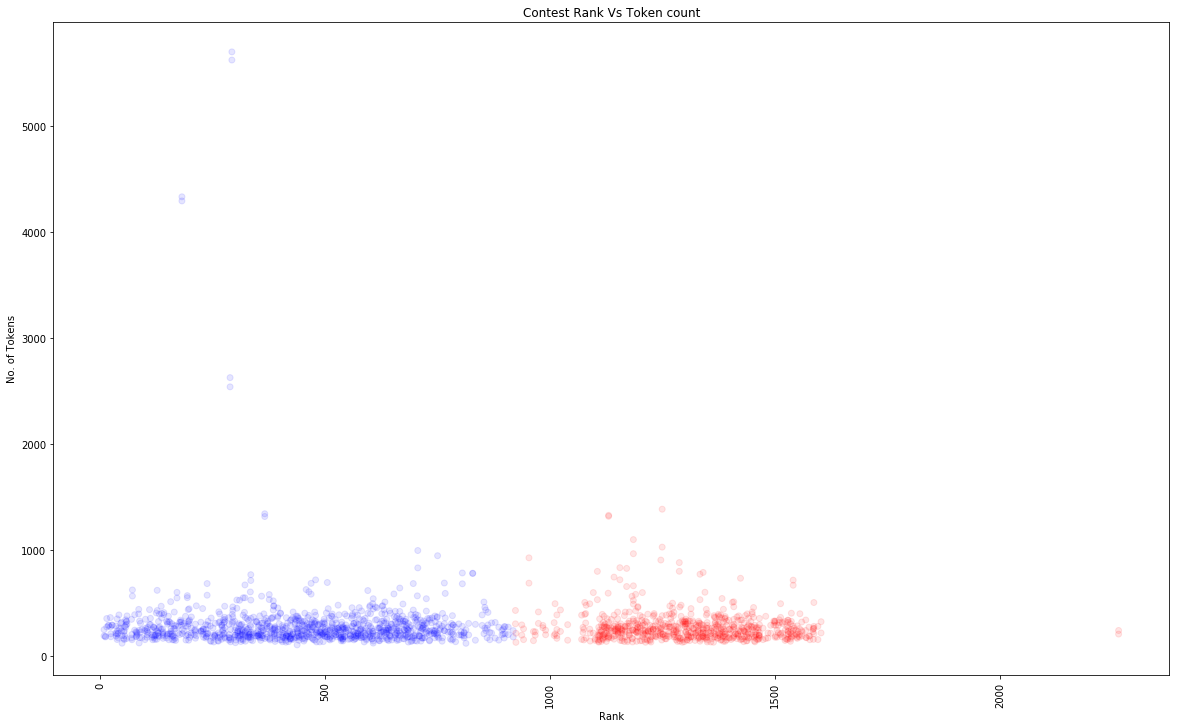

In [150]:
scgraph(user_rank,token_count,'Contest Rank Vs Token count','Rank','No. of Tokens')

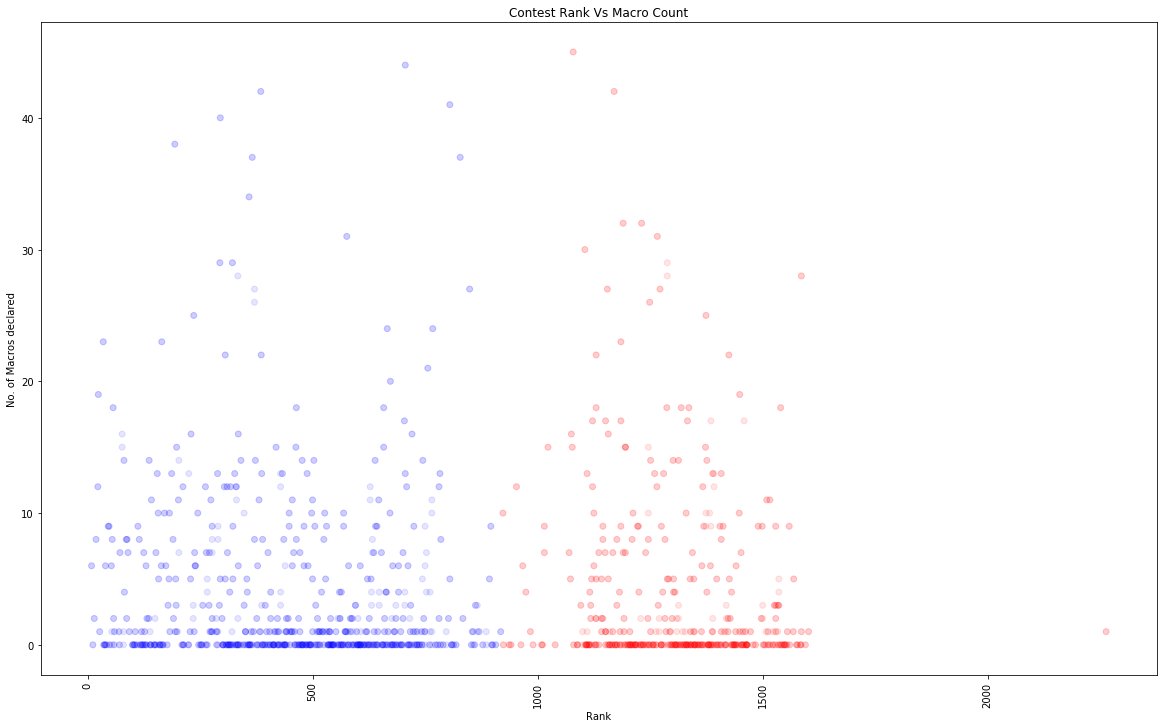

In [151]:
scgraph(user_rank,macro_count,'Contest Rank Vs Macro Count','Rank','No. of Macros declared')

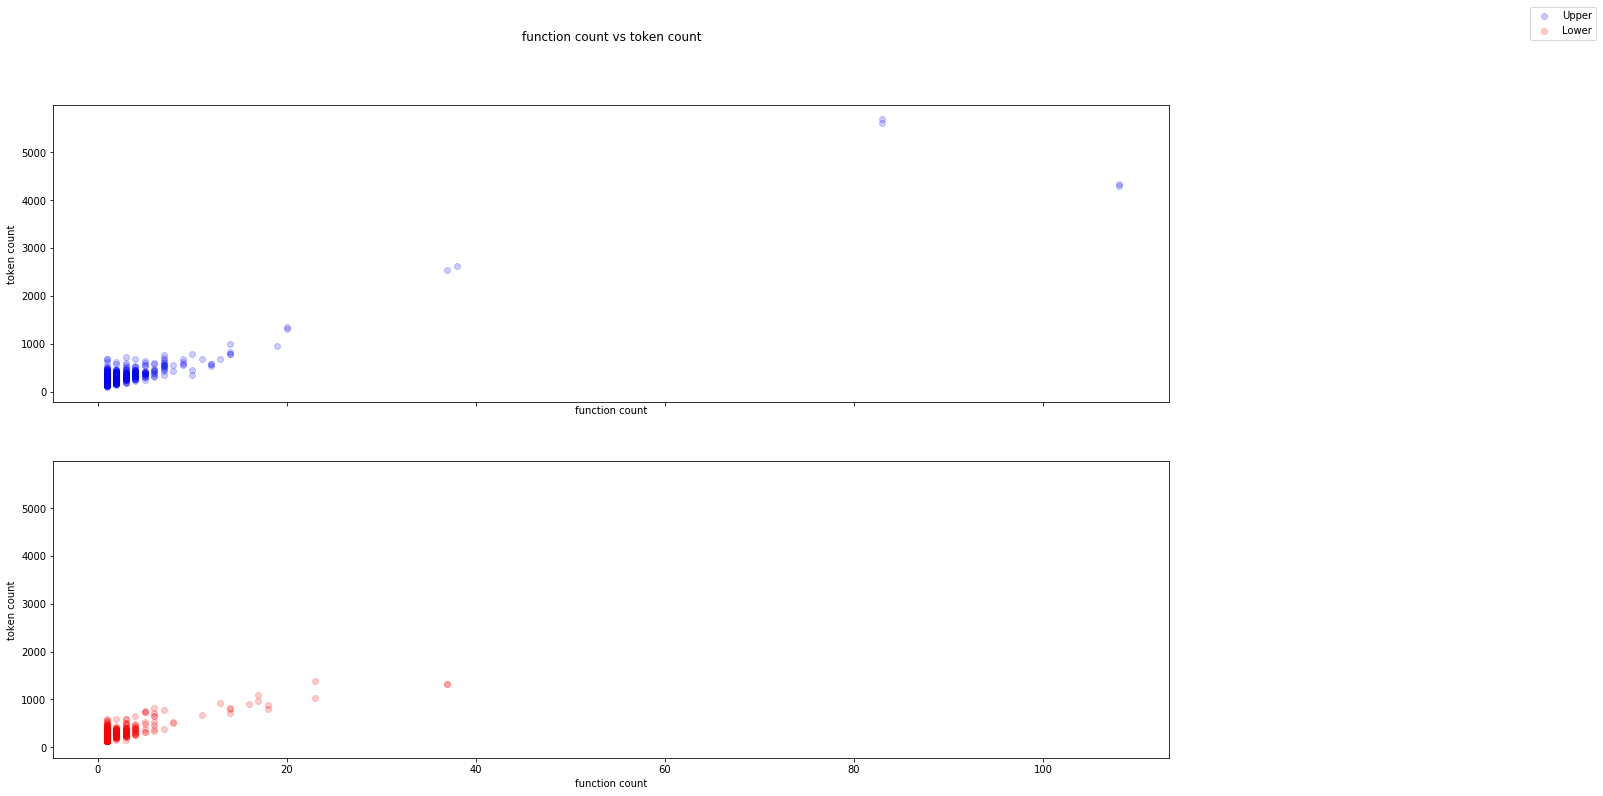

In [152]:
plot_data_2D_cat(function_count,token_count,userdiv,'function count vs token count','function count','token count')

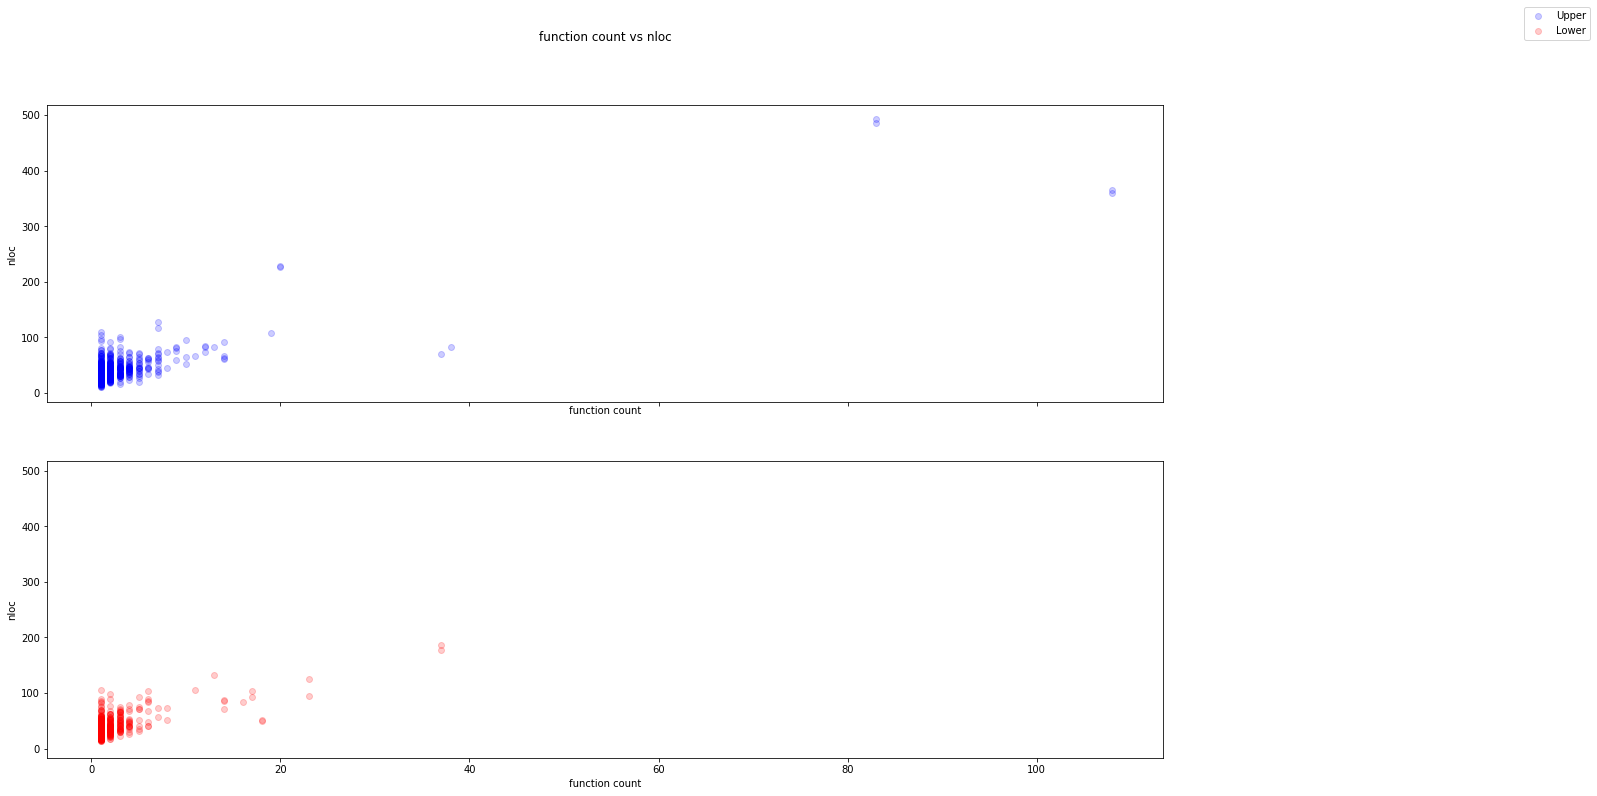

In [153]:
plot_data_2D_cat(function_count,nloc,userdiv,'function count vs nloc','function count','nloc')

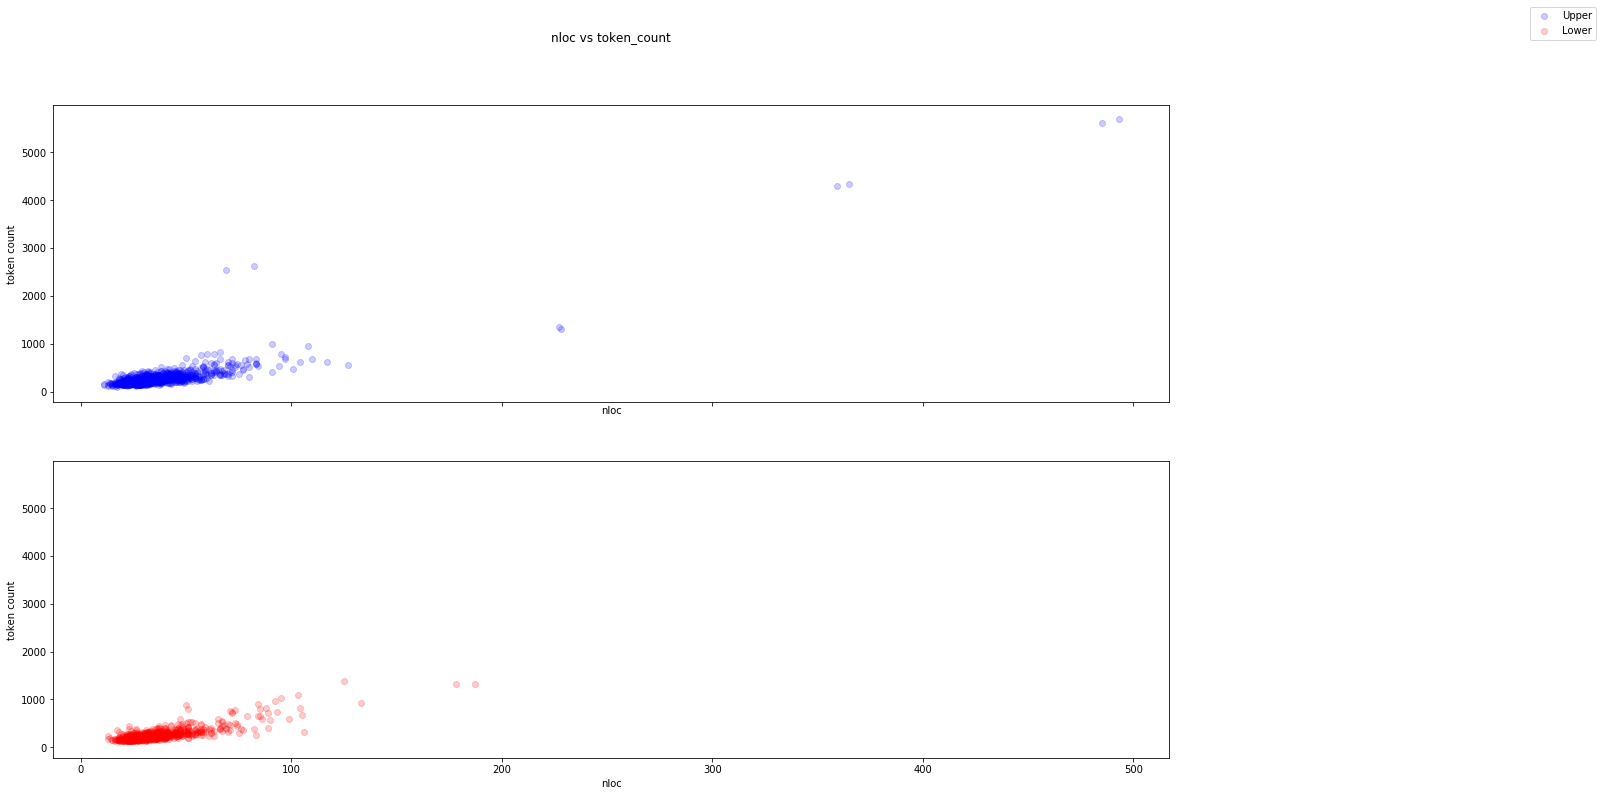

In [154]:
plot_data_2D_cat(nloc,token_count,userdiv,'nloc vs token_count','nloc','token count')

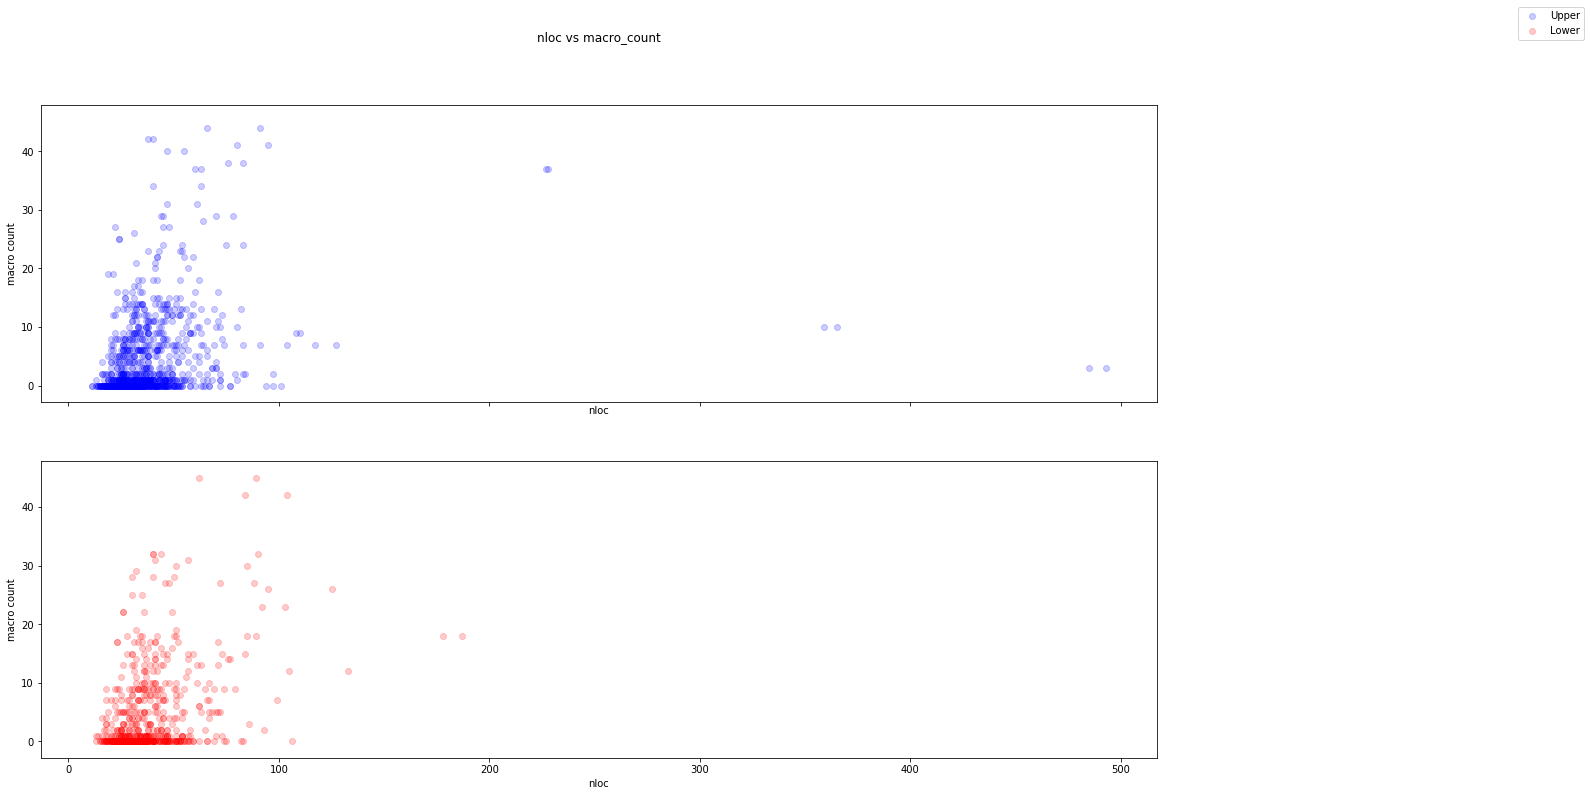

In [155]:
plot_data_2D_cat(nloc,macro_count,userdiv,'nloc vs macro_count','nloc','macro count')

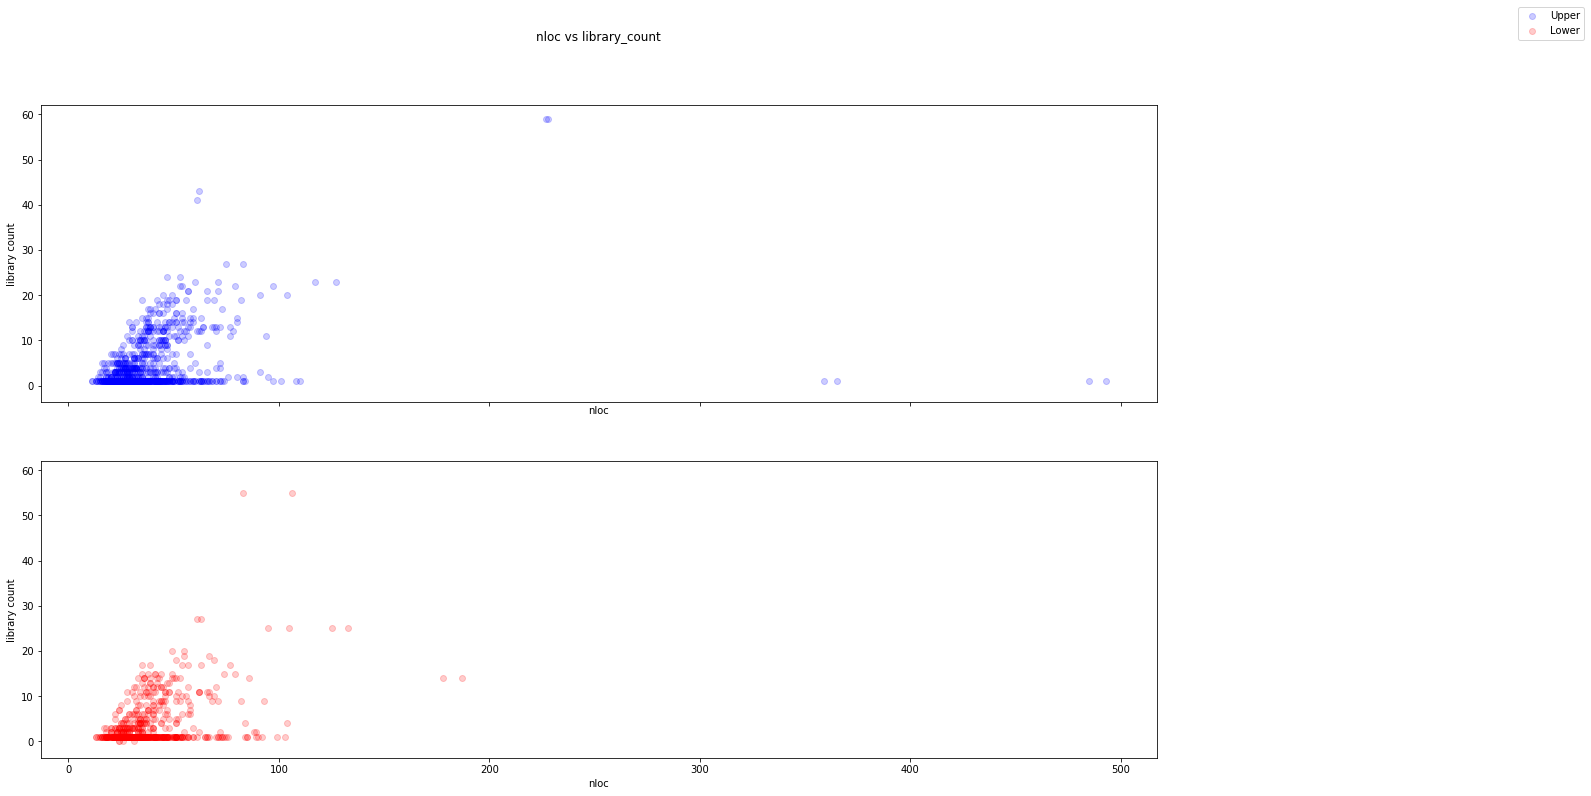

In [156]:
plot_data_2D_cat(nloc,library_count,userdiv,'nloc vs library_count','nloc','library count')

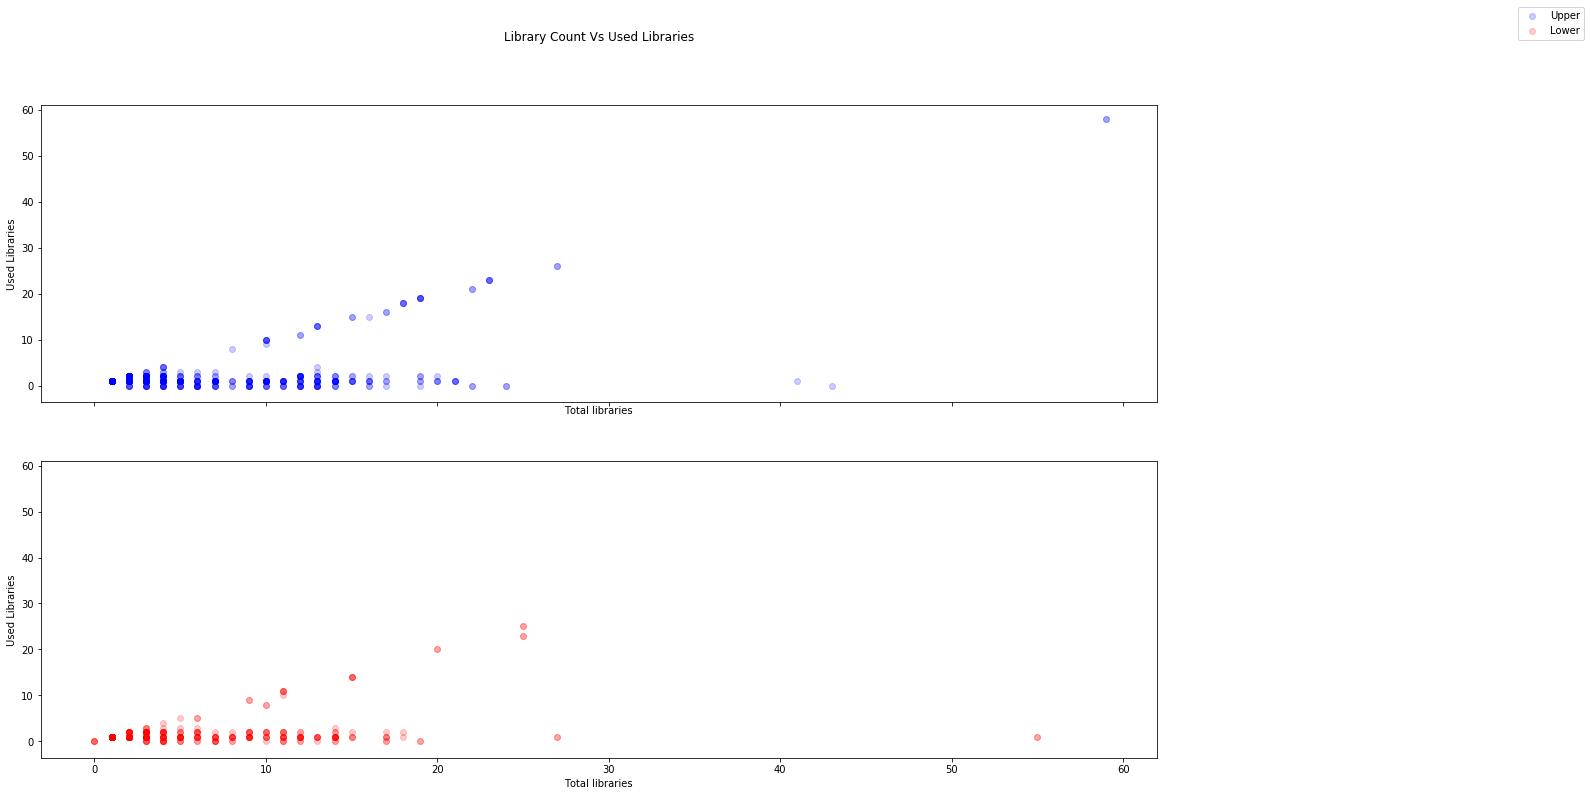

In [157]:
plot_data_2D_cat(library_count,used_library,userdiv,'Library Count Vs Used Libraries','Total libraries','Used Libraries')

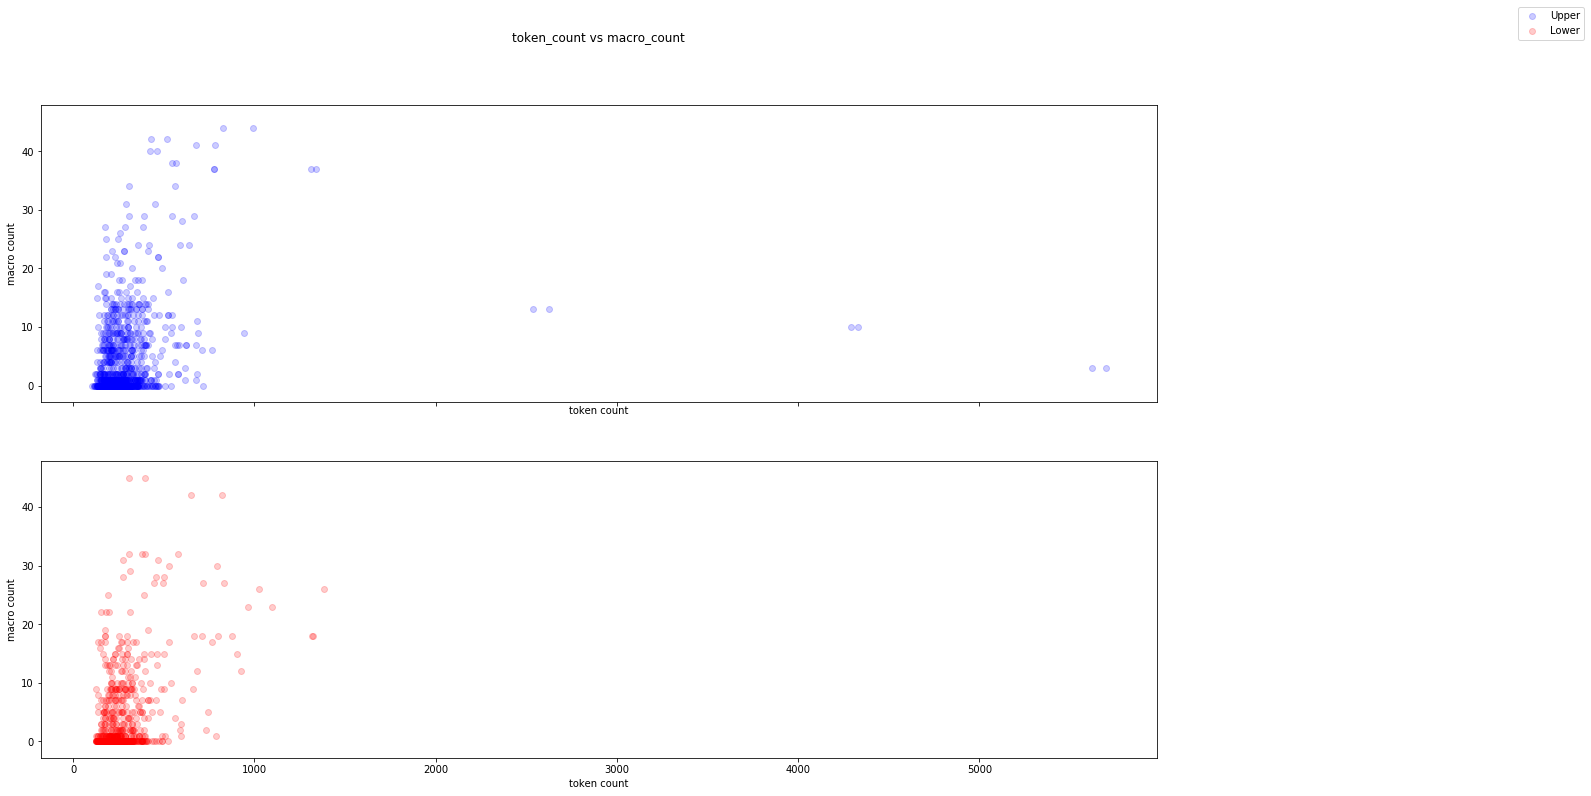

In [158]:
plot_data_2D_cat(token_count,macro_count,userdiv,'token_count vs macro_count','token count','macro count')

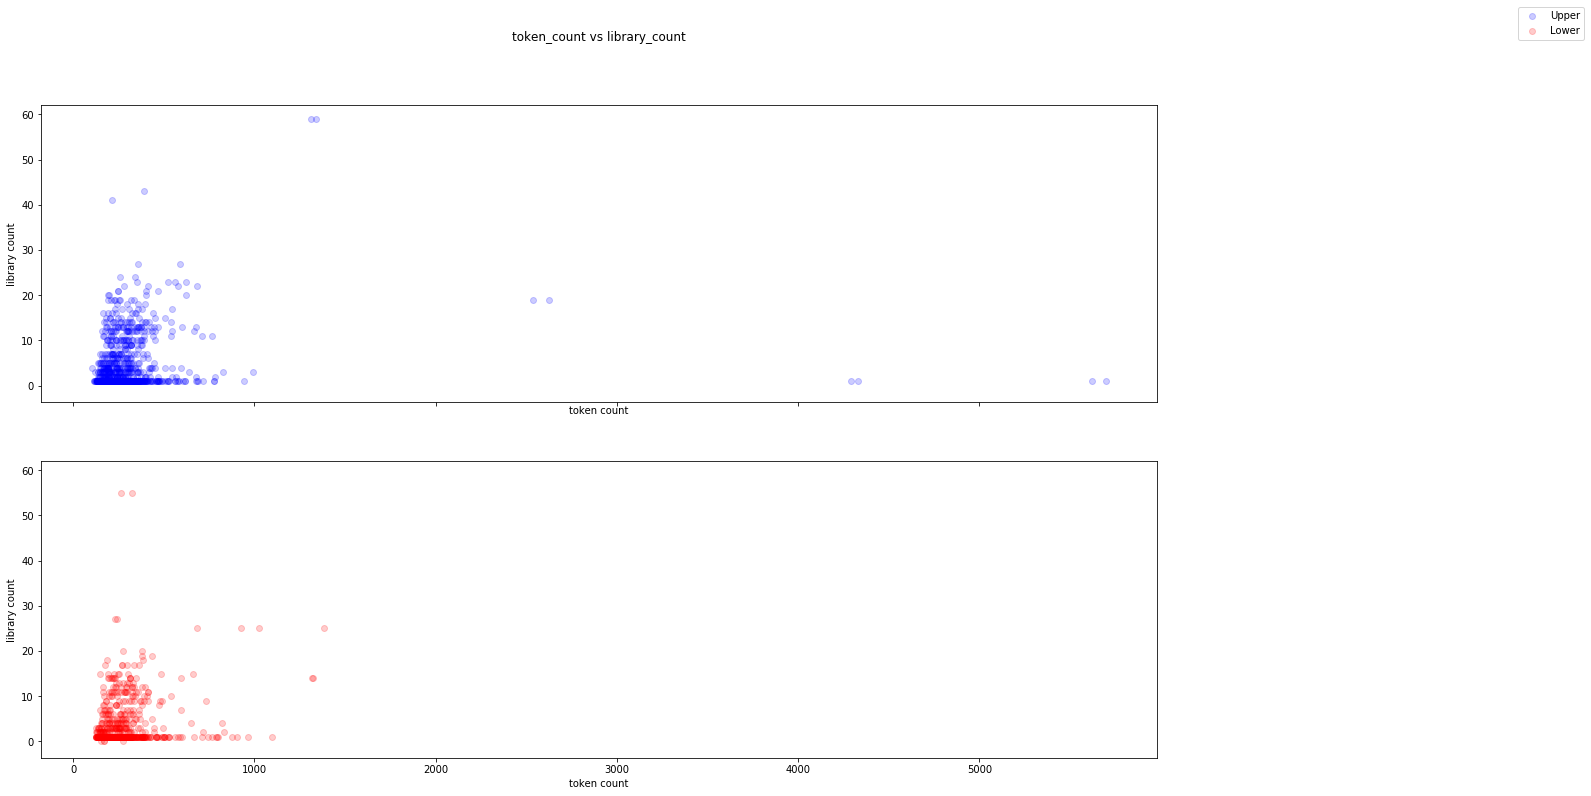

In [159]:
plot_data_2D_cat(token_count,library_count,userdiv,'token_count vs library_count','token count','library count')

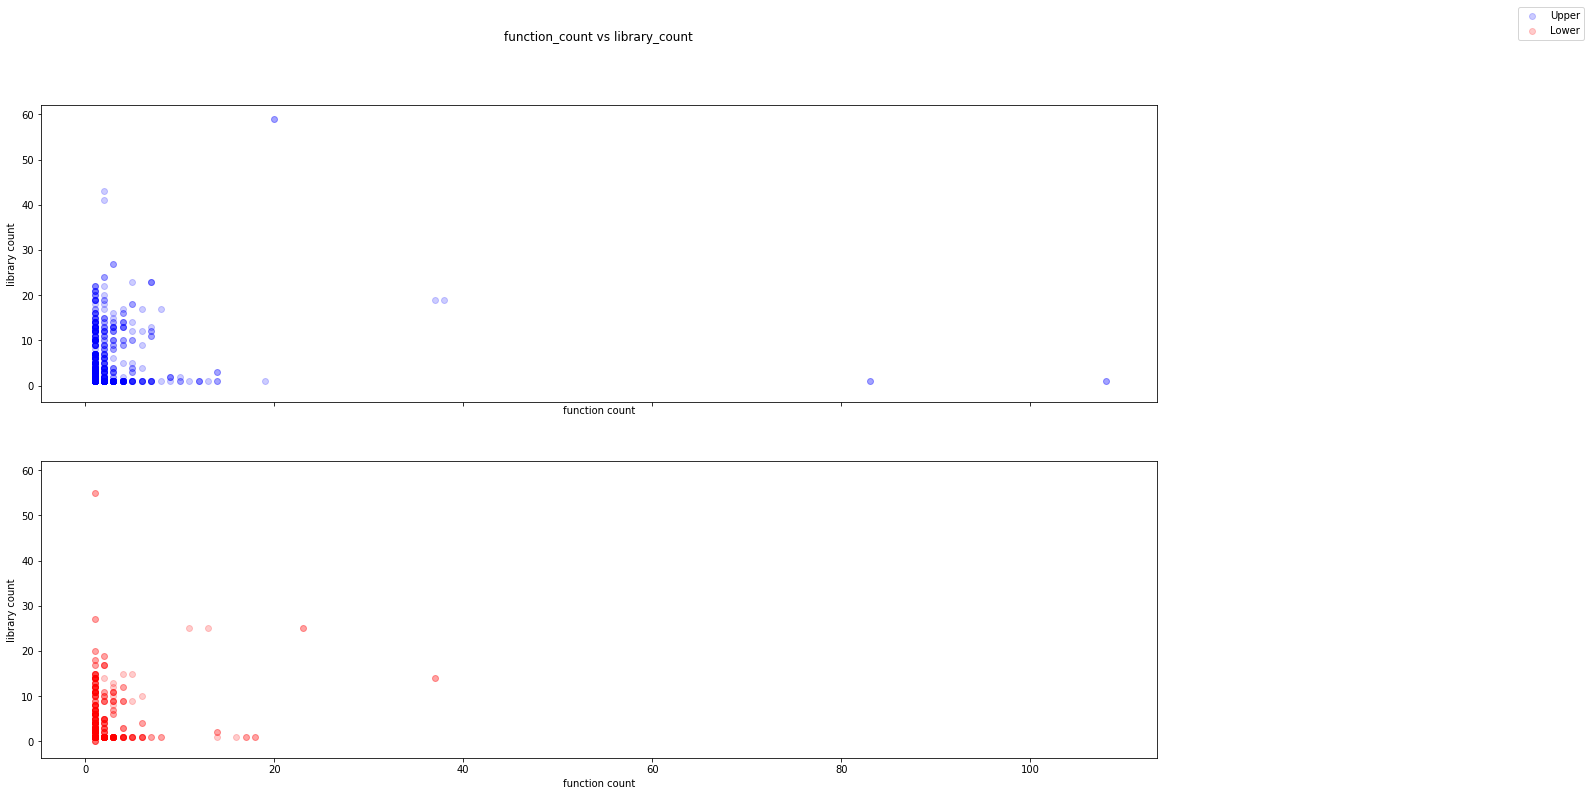

In [160]:
plot_data_2D_cat(function_count,library_count,userdiv,'function_count vs library_count','function count','library count')

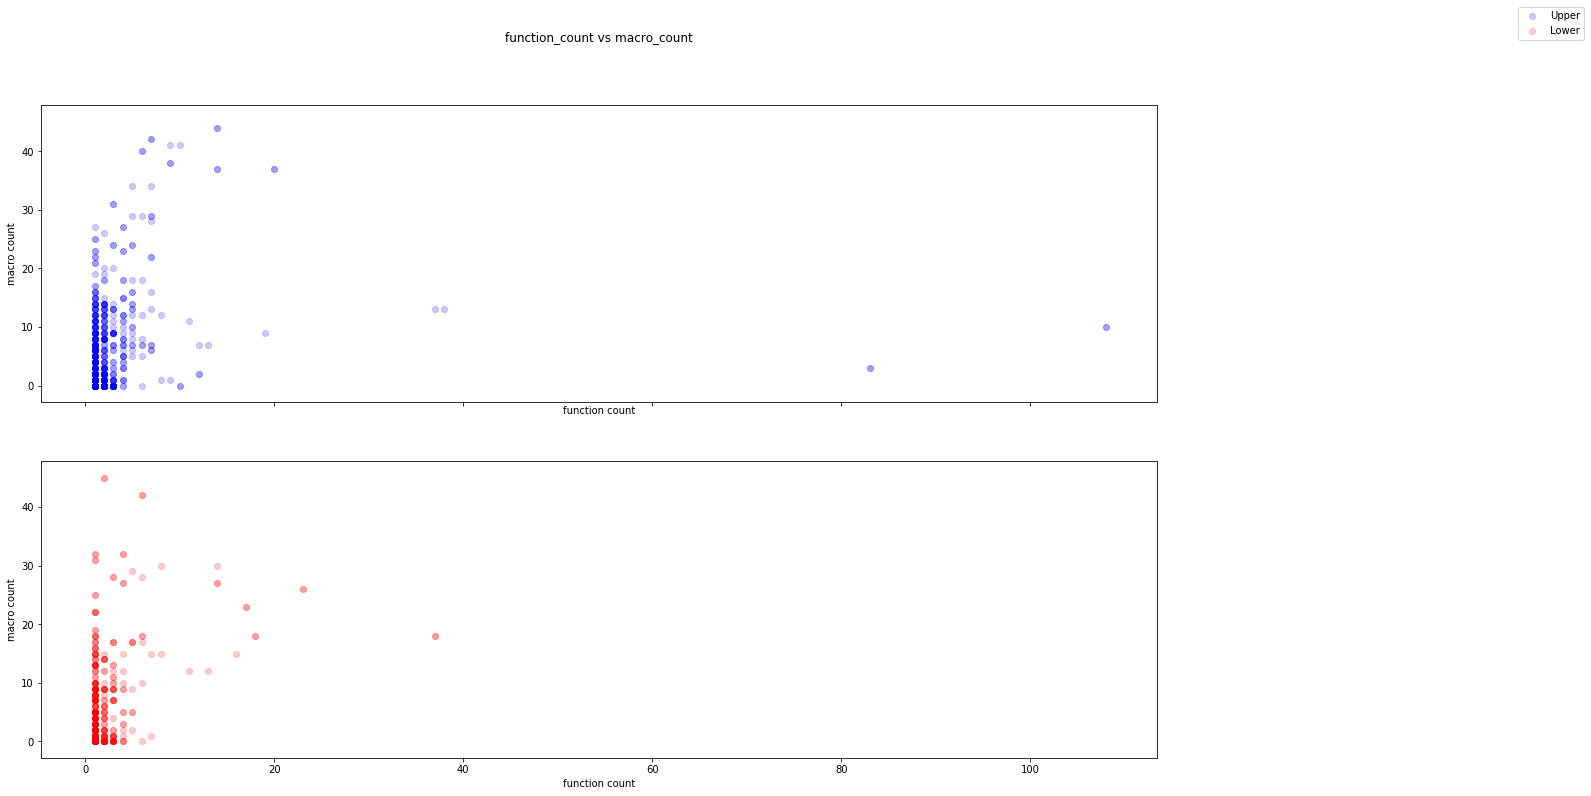

In [161]:
plot_data_2D_cat(function_count,macro_count,userdiv,'function_count vs macro_count','function count','macro count')

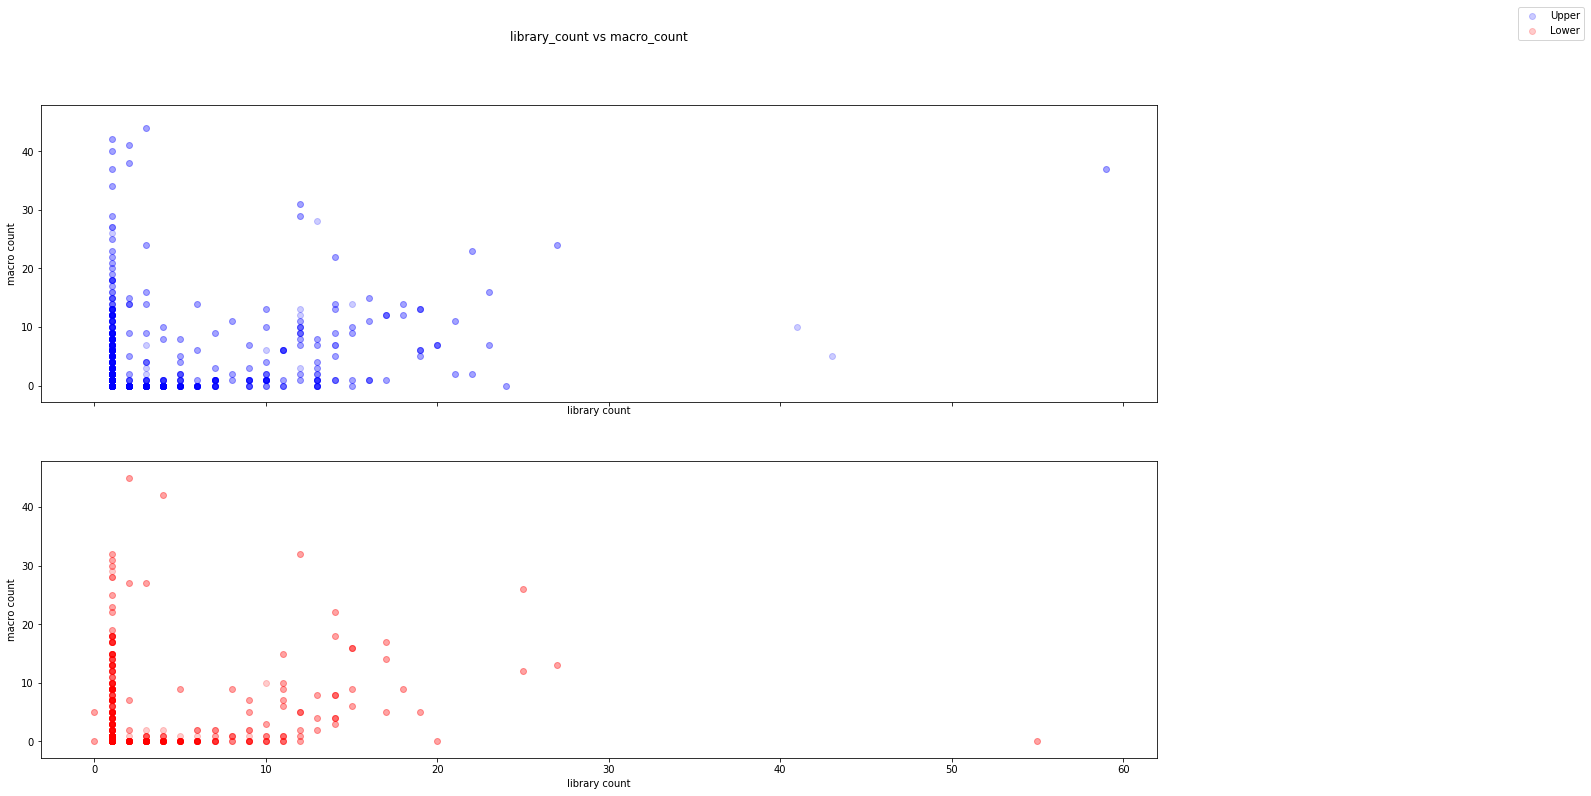

In [162]:
plot_data_2D_cat(library_count,macro_count,userdiv,'library_count vs macro_count','library count','macro count')

C:\Users\Mukesh Chugani\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


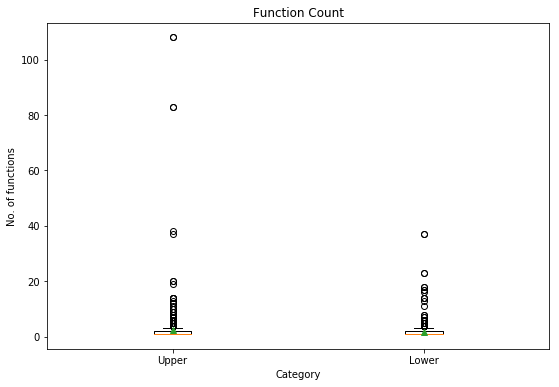

In [163]:
box_plot_cat(function_count,userdiv,'Function Count','Category','No. of functions')

C:\Users\Mukesh Chugani\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


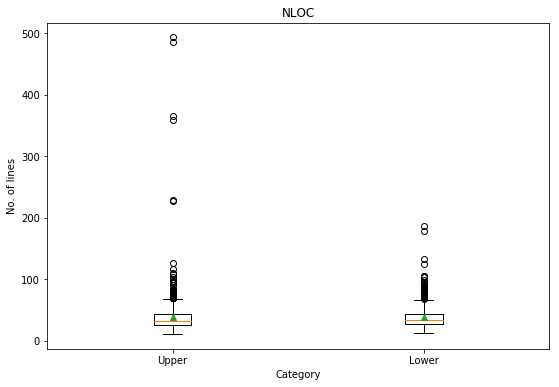

In [164]:
box_plot_cat(nloc,userdiv,'NLOC','Category','No. of lines')

C:\Users\Mukesh Chugani\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


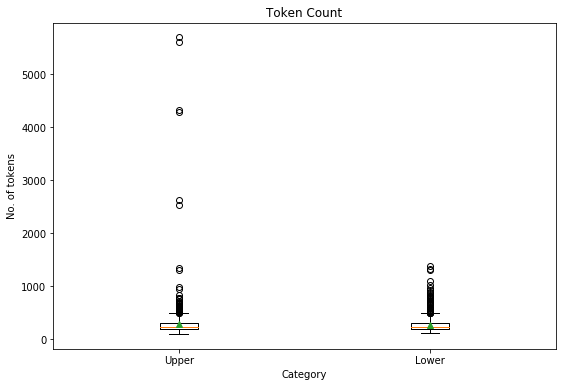

In [165]:
box_plot_cat(token_count,userdiv,'Token Count','Category','No. of tokens')

C:\Users\Mukesh Chugani\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


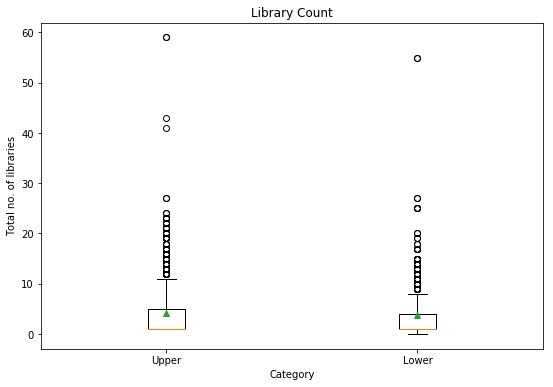

In [166]:
box_plot_cat(library_count,userdiv,'Library Count','Category','Total no. of libraries')

C:\Users\Mukesh Chugani\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


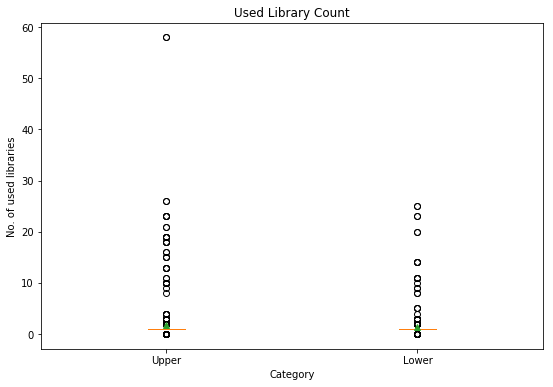

In [167]:
box_plot_cat(used_library,userdiv,'Used Library Count','Category','No. of used libraries')

C:\Users\Mukesh Chugani\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


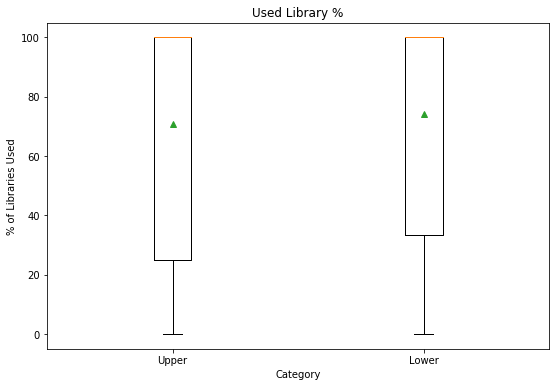

In [168]:
box_plot_cat(used_library_per,userdiv,'Used Library %','Category','% of Libraries Used')

C:\Users\Mukesh Chugani\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


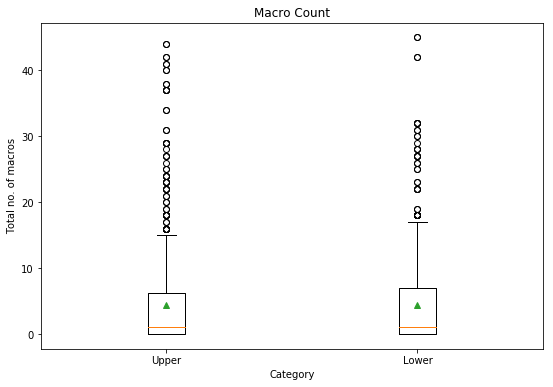

In [169]:


box_plot_cat(macro_count,userdiv,'Macro Count','Category','Total no. of macros')

C:\Users\Mukesh Chugani\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


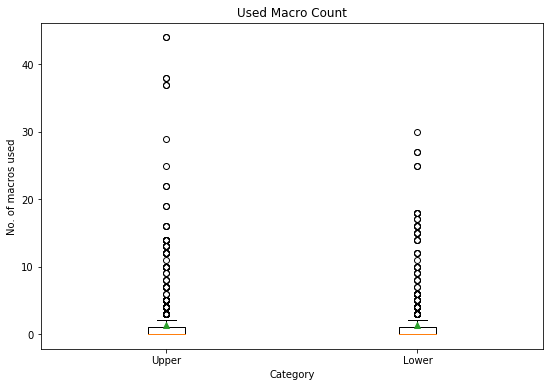

In [170]:
box_plot_cat(used_macro,userdiv,'Used Macro Count','Category','No. of macros used')

C:\Users\Mukesh Chugani\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


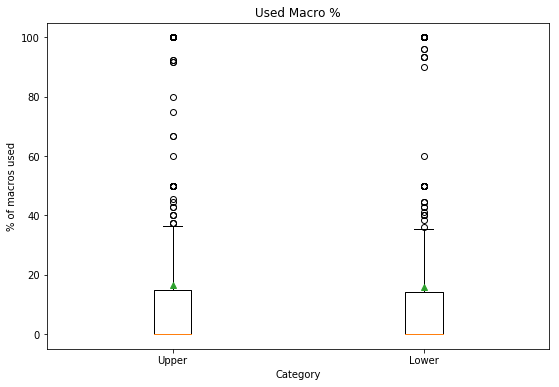

In [171]:
box_plot_cat(used_macro_per,userdiv,'Used Macro %','Category','% of macros used')

C:\Users\Mukesh Chugani\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


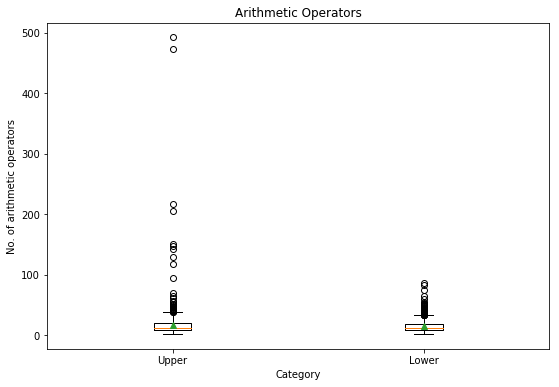

In [172]:
box_plot_cat(mat_op,userdiv,'Arithmetic Operators','Category','No. of arithmetic operators')

C:\Users\Mukesh Chugani\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


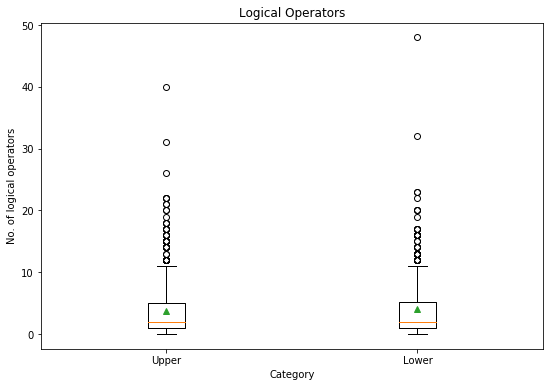

In [173]:
box_plot_cat(logical_op,userdiv,'Logical Operators','Category','No. of logical operators')

C:\Users\Mukesh Chugani\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


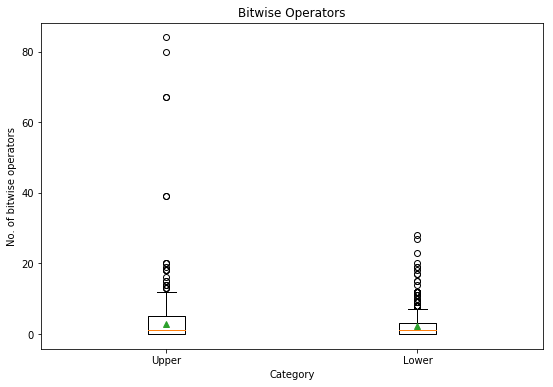

In [174]:
box_plot_cat(bit_op,userdiv,'Bitwise Operators','Category','No. of bitwise operators')

In [175]:
dt_avg_1 = []
for i in range(len(dt_count_1)):
    sum1 = 0
    for j in range(len(dt_count_1[i])):
        sum1 += dt_count_1[i][j]
    sum1 /= len(dt_count_1[i])
    dt_avg_1.append(sum1)
    
dt_avg_2 = []
for i in range(len(dt_count_2)):
    sum2 = 0
    for j in range(len(dt_count_2[i])):
        sum2 += dt_count_2[i][j]
    sum2 /= len(dt_count_2[i])
    dt_avg_2.append(sum2)
print(dt_avg_1)
print(dt_avg_2)

[0.08627450980392157, 0.020588235294117647, 0.06470588235294118, 0.5784313725490197, 0.2, 6.559803921568627, 0.12254901960784313, 0.953921568627451, 0.027450980392156862, 0.9264705882352942, 1.2009803921568627]
[0.11176470588235295, 0.010294117647058823, 0.0, 0.5352941176470588, 0.20588235294117646, 5.323529411764706, 0.10147058823529412, 0.9220588235294118, 0.06911764705882353, 0.5911764705882353, 1.3014705882352942]


Text(0,0.5,'Average no. per submission')

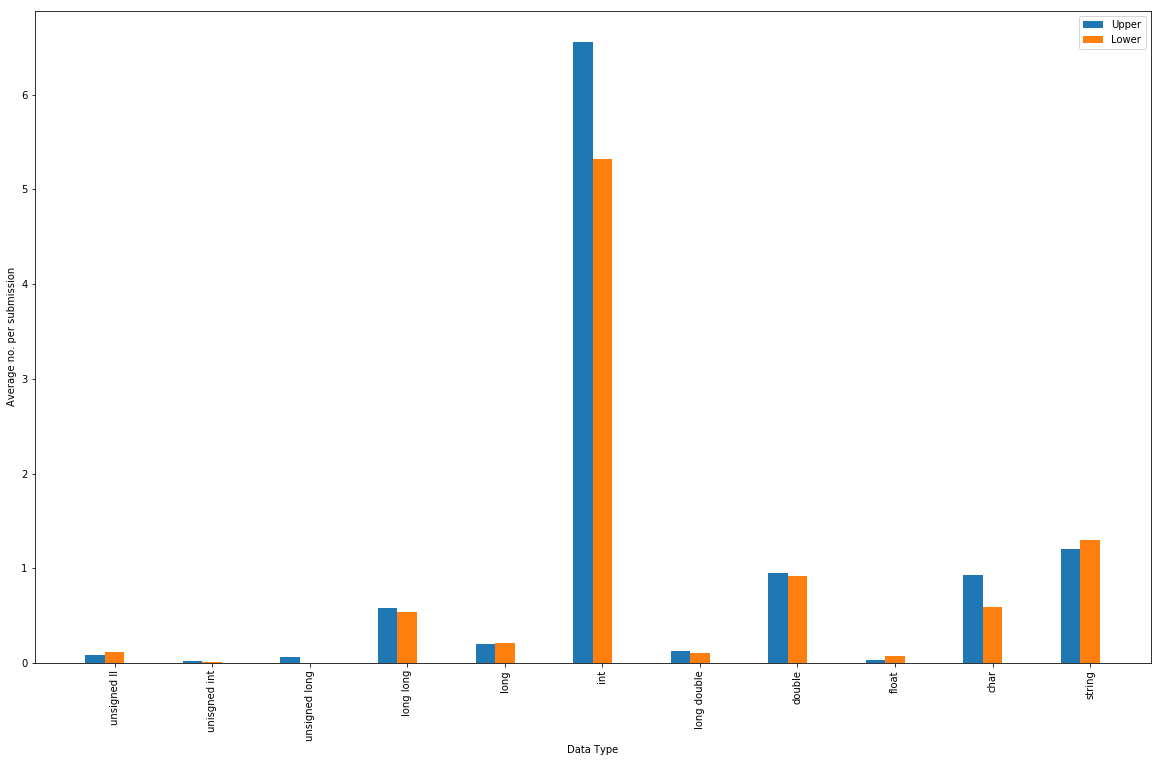

In [176]:
x_l = np.arange(len(dt_order))
width = 0.2
plt.bar(x_l-width, dt_avg_1, width=0.2)
plt.bar(x_l, dt_avg_2, width=0.2)
plt.xticks(x_l, dt_order,rotation = 'vertical')
plt.legend(['Upper','Lower'])
plt.xlabel('Data Type')
plt.ylabel('Average no. per submission')

In [177]:
fig_size = plt.rcParams["figure.figsize"]
print(fig_size)
fig_size[0] = 9
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size
plt.rcParams["figure.figsize"]

[20.0, 12.0]


[9.0, 12.0]

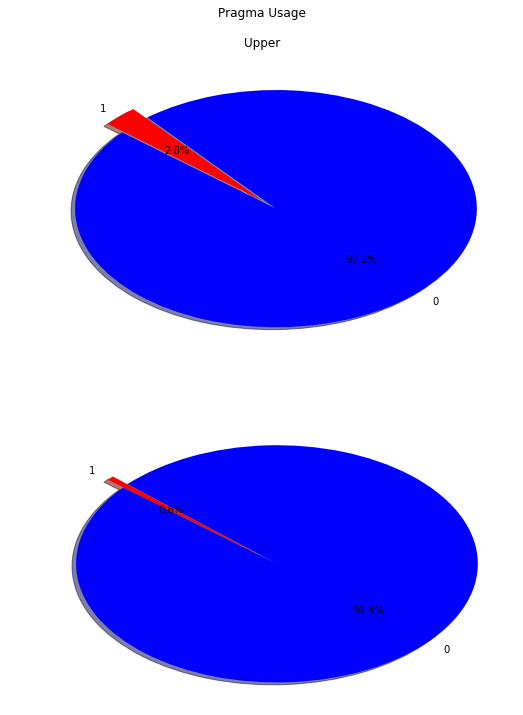

In [178]:
pie_plot(pragma,userdiv,'Pragma Usage')

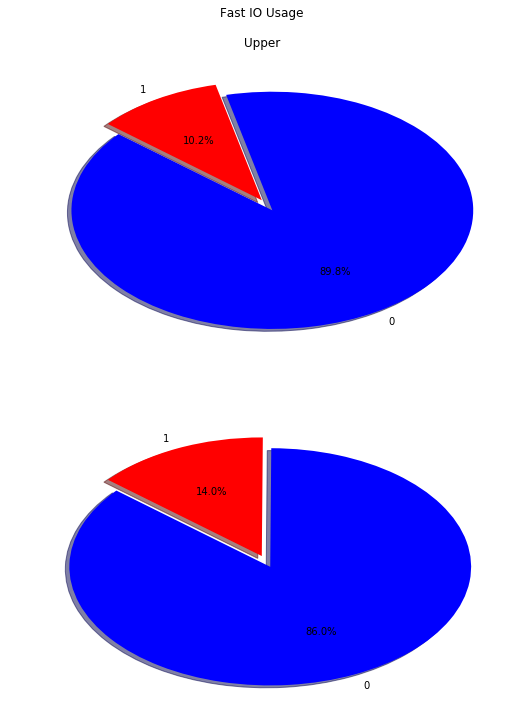

In [179]:
pie_plot(fastio,userdiv,'Fast IO Usage')

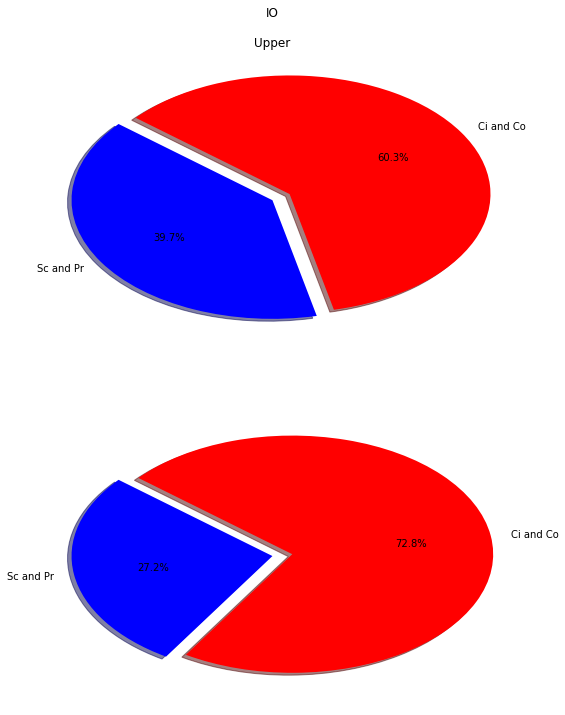

In [180]:
X1 = []
C1 = []
for i in range(len(scpr)):
    if (scpr[i][0]>0 or scpr[i][1]>0) and (cio[i][0]>0 or cio[i][1]>0):
        continue
    else:
        if (scpr[i][0]>0 or scpr[i][1]>0):
            X1.append('Sc and Pr')
        else:
            X1.append('Ci and Co')
        C1.append(userdiv[i])
pie_plot(X1,C1,'IO')